In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# import matplotlib and seaborn packages for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data and storing it into dataframe
loan = pd.read_csv("C:/PGDDS/gramener_case_study/loan.csv")
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Inspection

In [4]:
# Inspecting data in Loan dataframe
print(loan.info())
print("\n")

print(loan.describe())
print("\n")

print(loan.columns)
print("\n")

print(loan.size)
print("\n")

print(loan.shape)
print("\n")

print(loan.ndim)
print("\n")

print(loan.dtypes)
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std   

In [5]:
# To verify if any duplicate row is present or not
loan.duplicated(subset = ['id','member_id']).sum()

0

# Data Cleaning

In [6]:
# Code for column-wise null percentages
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          0.00
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
# Inspecting data having 100% Null values i.e all null values
all_null = 100*(loan.isnull().sum() / len(loan))
print("Number of columns having 100% Null values:-",all_null[all_null >= 100].count())

# Remove all columns having 100% Null values
loan = loan.dropna(thresh=1,axis=1)
loan.head(5)

Number of columns having 100% Null values:- 54


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Inspecting the dataframe after removing column having 100% Null values
loan.shape

(39717, 57)

In [9]:
# Code for column-wise null percentages after removing column having 50% Null values
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [10]:
# Inspecting data having 50% Null values
half_null = 100*(loan.isnull().sum() / len(loan))
print("Number of columns having more than 50% Null values:-",half_null[half_null >= 50].count())

# Cleaning data having greater than 50% Null values
loan = loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
loan.head(5)

Number of columns having more than 50% Null values:- 3


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# Inspecting the dataframe after removing column having having 50% Null values
loan.shape

(39717, 54)

In [12]:
# Code for column-wise null percentages after removing column having 50% Null values
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
# Inspecting column having only 1 unique values for all the rows
loan.loc[:,(loan.nunique()==1)].head(5)

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [14]:
# Remove all columns that has only 1 unique value as it doesn't add any information to analysis
loan = loan.loc[:,~(loan.nunique()==1)]
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [15]:
# Inspecting the dataframe after removing column having 1 values
loan.shape

(39717, 45)

In [16]:
# Code for column-wise null percentages after removing column having 1 values
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util

In [17]:
# Removing column not needed for analysis
loan = loan.drop(['url','desc','zip_code'],axis=1)
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [18]:
# Inspecting the dataframe after removing column having 1 values
loan.shape

(39717, 42)

In [19]:
# Are there any rows having more than 5 Nan values ?
loan[loan.isnull().sum(axis=1) >=5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [20]:
# Removing the column not useful for Analysis for loan_status = 'Charged Off'
loan = loan.drop(['member_id','emp_title','title','inq_last_6mths','out_prncp','out_prncp_inv',
                  'total_rec_late_fee','recoveries','collection_recovery_fee','pub_rec_bankruptcies','total_rec_prncp'], axis=1)
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0,13648,83.70%,9,5863.155187,5833.84,863.16,Jan-15,171.62,May-16
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0,1687,9.40%,4,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0,2956,98.50%,10,3005.666844,3005.67,605.67,Jun-14,649.91,May-16
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0,5598,21%,37,12231.890000,12231.89,2214.92,Jan-15,357.48,Apr-16
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0,27783,53.90%,38,3513.330000,3513.33,1037.39,May-16,67.79,May-16


In [21]:
# Inspecting the dataframe after removing un-necessary column
loan.shape

(39717, 31)

In [22]:
# Code for column-wise null percentages after removing column having 1 values
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                     0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.13
total_acc              0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_int          0.00
last_pymnt_d           0.18
last_pymnt_amnt        0.00
last_credit_pull_d     0.01
dtype: float64

In [23]:
# Column retained after Data Cleaning process
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

# Data Quality Issues Handling

In [24]:
# Converting columns containing string to date format
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0,13648,83.70%,9,5863.155187,5833.84,863.16,2015-01-01,171.62,2016-05-01
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0,1687,9.40%,4,1008.710000,1008.71,435.17,2013-04-01,119.66,2013-09-01
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0,2956,98.50%,10,3005.666844,3005.67,605.67,2014-06-01,649.91,2016-05-01
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0,5598,21%,37,12231.890000,12231.89,2214.92,2015-01-01,357.48,2016-04-01
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0,27783,53.90%,38,3513.330000,3513.33,1037.39,2016-05-01,67.79,2016-05-01


#### Year assumption. 
Any earliest credit line date, if found beyond 2018 will be treated as date of previous century.
More information can be referenced on stackoverflow
https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year

In [25]:
# Fixing missing values
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: (x - pd.DateOffset(years=100)) if (x.year > 2018) else x)   
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0,13648,83.70%,9,5863.155187,5833.84,863.16,2015-01-01,171.62,2016-05-01
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0,1687,9.40%,4,1008.710000,1008.71,435.17,2013-04-01,119.66,2013-09-01
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0,2956,98.50%,10,3005.666844,3005.67,605.67,2014-06-01,649.91,2016-05-01
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0,5598,21%,37,12231.890000,12231.89,2214.92,2015-01-01,357.48,2016-04-01
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0,27783,53.90%,38,3513.330000,3513.33,1037.39,2016-05-01,67.79,2016-05-01


In [26]:
# Removing % symbol from those columns that contain % symbols
loan['int_rate'] = loan['int_rate'].astype(str).apply(lambda x: x.strip('%'))

# Fill the Nan with % so that it can be removed  
loan['revol_util'] = loan['revol_util'].fillna('0%') # Imputing Nan to 0%
loan['revol_util'] = loan['revol_util'].astype(str).apply(lambda x: x.strip('%'))

loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0,13648,83.70,9,5863.155187,5833.84,863.16,2015-01-01,171.62,2016-05-01
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,0,1687,9.40,4,1008.710000,1008.71,435.17,2013-04-01,119.66,2013-09-01
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0,2956,98.50,10,3005.666844,3005.67,605.67,2014-06-01,649.91,2016-05-01
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0,5598,21,37,12231.890000,12231.89,2214.92,2015-01-01,357.48,2016-04-01
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0,27783,53.90,38,3513.330000,3513.33,1037.39,2016-05-01,67.79,2016-05-01


In [27]:
# Inspecting data types of the retained columns
loan.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line       datetime64[ns]
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc                       int64
total_pymnt                   float64
total_pymnt_

In [28]:
# Converting some non-numeric columns required to be integer into numeric data type
numeric_columns = ['loan_amnt','funded_amnt','installment','int_rate','funded_amnt_inv','annual_inc','dti','revol_util']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [29]:
# Inspecting loan dataframe after handling Data Quality Issues
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0,13648,83.7,9,5863.155187,5833.84,863.16,2015-01-01,171.62,2016-05-01
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,0,1687,9.4,4,1008.710000,1008.71,435.17,2013-04-01,119.66,2013-09-01
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0,2956,98.5,10,3005.666844,3005.67,605.67,2014-06-01,649.91,2016-05-01
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0,5598,21.0,37,12231.890000,12231.89,2214.92,2015-01-01,357.48,2016-04-01
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0,27783,53.9,38,3513.330000,3513.33,1037.39,2016-05-01,67.79,2016-05-01


# Data Analysis

## Univariate Analysis for Categorical Columns

### For Term Column

In [30]:
# Calculating frequency for each term
term_freq = loan.groupby(['term'])['id'].count().reset_index()
print(term_freq)

         term     id
0   36 months  29096
1   60 months  10621


In [31]:
# Calculating frequency for term against all loan status
loan_status_term_freq = loan.groupby(['term','loan_status'])['id'].count().reset_index()
print(loan_status_term_freq.head(5))
print("\n")

# Calculating Percentage for term against all loan status
loan_status_term_per = loan.groupby(['term','loan_status'])['id'].count()
loan_status_term_per = loan_status_term_per.groupby(['term']).apply(lambda x: round(100*(x/x.sum()),2))
loan_status_term_per = loan_status_term_per.reset_index()
print(loan_status_term_per.head(5))

         term  loan_status     id
0   36 months  Charged Off   3227
1   36 months   Fully Paid  25869
2   60 months  Charged Off   2400
3   60 months      Current   1140
4   60 months   Fully Paid   7081


         term  loan_status     id
0   36 months  Charged Off  11.09
1   36 months   Fully Paid  88.91
2   60 months  Charged Off  22.60
3   60 months      Current  10.73
4   60 months   Fully Paid  66.67


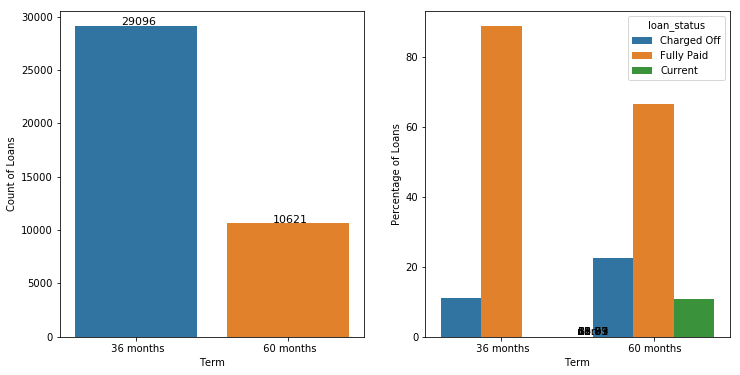

In [32]:
# Plots for Term Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(12,6))

# Plot for number of loans given in each term.
plt.subplot(1,2,1)
ax = sns.countplot(x='term', data=loan, order=loan['term'].value_counts().index)
ax.set(xlabel = 'Term', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+80,int(i.get_height()), fontsize=11)


# Plot for Percentage of Loans given in each term and loan_status
plt.subplot(1,2,2)
ax=sns.barplot(x='term', y='id',hue='loan_status', data=loan_status_term_per.reset_index())
ax.set(xlabel = 'Term', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5,0.5, i.get_height(), fontsize=11)
    
# for i in ax.patches:
#     ax.text(i.get_x()+0.001, i.get_height()+0.6, i.get_height(), fontsize=11)

plt.show()

#### From the above plot we can see
        For 36 Months - Charged off per is 11.09%
        For 60 Months - Charged off per is 25.31%
We can say that higher the term of loan, more is the probability of loan getting defaulted.<br>
So, __term__ is among one of the __Driving Variable for Loan Default (Charged Off)__

### For Grade Column

In [33]:
# Calculating frequency for each Grade
grade_freq = loan.groupby(['grade'])['id'].count().reset_index()
print(grade_freq)

  grade     id
0     A  10085
1     B  12020
2     C   8098
3     D   5307
4     E   2842
5     F   1049
6     G    316


In [34]:
# Calculating frequency for each Grade against all loan status
loan_status_grade_freq = loan.groupby(['grade','loan_status'])['id'].count().reset_index()
print(loan_status_grade_freq.head(5))
print("\n")

# Calculating Percentage for each Grade against all loan status
loan_status_grade_per = loan.groupby(['grade','loan_status'])['id'].count()
loan_status_grade_per = loan_status_grade_per.groupby(['grade']).apply(lambda x: round(100*(x/x.sum()),2))
loan_status_grade_per = loan_status_grade_per.reset_index()
print(loan_status_grade_per.head(5))

  grade  loan_status    id
0     A  Charged Off   602
1     A      Current    40
2     A   Fully Paid  9443
3     B  Charged Off  1425
4     B      Current   345


  grade  loan_status     id
0     A  Charged Off   5.97
1     A      Current   0.40
2     A   Fully Paid  93.63
3     B  Charged Off  11.86
4     B      Current   2.87


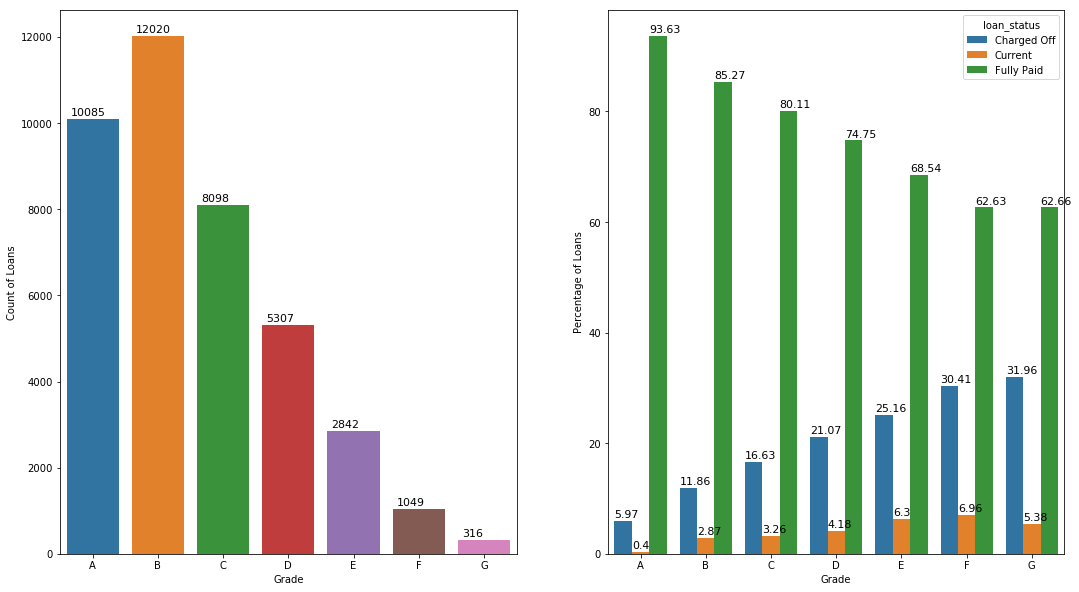

In [35]:
# Plots for Grade Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(18,10))

# Plot for number of loans given in each grade.
plt.subplot(1,2,1)
ax = sns.countplot(x='grade', data=loan, order=['A','B','C','D','E','F','G'])
ax.set(xlabel = 'Grade', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+80,int(i.get_height()), fontsize=11)

    
# Plot for Percentage of Loans given in each grade and loan_status .
plt.subplot(1,2,2)
ax=sns.barplot(x='grade', y='id',hue='loan_status', data=loan_status_grade_per,order=['A','B','C','D','E','F','G']) 
ax.set(xlabel = 'Grade', ylabel = 'Percentage of Loans')

#Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.001, i.get_height()+0.6, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan increases as the Grade increases.
        For Grade A - Charged off per is 5.97%
        For Grade B - Charged off per is 11.86%
        For Grade C - Charged off per is 16.63%
        For Grade D - Charged off per is 21.07%
        For Grade E - Charged off per is 25.16%
        For Grade F - Charged off per is 30.41%
        For Grade G - Charged off per is 31.96%
So __Grade__ is among one of the __Driving Variable for Loan Default (Charged Off)__

### For Sub_grade column

In [36]:
# Calculating frequency for each sub-grade
sub_grade_freq = loan.groupby(['sub_grade'])['id'].count()
print(grade_freq)

  grade     id
0     A  10085
1     B  12020
2     C   8098
3     D   5307
4     E   2842
5     F   1049
6     G    316


In [37]:
# Calculating frequency for each sub-grade against all loan status
loan_status_subgrade_freq = loan.groupby(['sub_grade','loan_status'])['id'].count()
print(loan_status_subgrade_freq.head())
print("\n")

# Calculating Percentage for each sub-grade against all loan status
loan_status_subgrade_per = loan.groupby(['sub_grade','loan_status'])['id'].count()
loan_status_subgrade_per = loan_status_subgrade_per.groupby(['sub_grade']).apply(lambda x: round(100*(x/x.sum()),2))
loan_status_subgrade_per = loan_status_subgrade_per.reset_index()
print(loan_status_subgrade_per.head(5))

sub_grade  loan_status
A1         Charged Off      30
           Fully Paid     1109
A2         Charged Off      74
           Fully Paid     1434
A3         Charged Off     103
Name: id, dtype: int64


  sub_grade  loan_status     id
0        A1  Charged Off   2.63
1        A1   Fully Paid  97.37
2        A2  Charged Off   4.91
3        A2   Fully Paid  95.09
4        A3  Charged Off   5.69


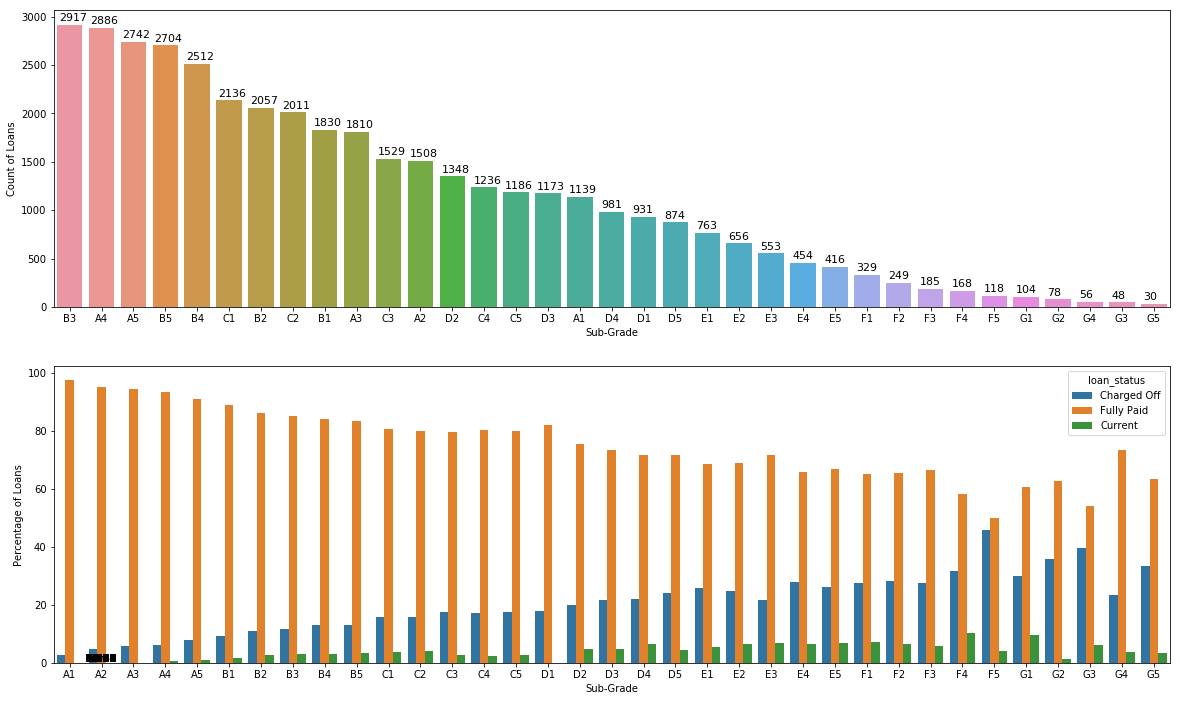

In [38]:
# Plots for Sub-grade Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(20,12))

# Plot for number of loans given in each sub-grade.
plt.subplot(2,1,1)
ax = sns.countplot(x='sub_grade', data=loan, order=loan['sub_grade'].value_counts().index)
ax.set(xlabel = 'Sub-Grade', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of Loans given in each sub-grade and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='sub_grade', y='id',hue='loan_status', data=loan_status_subgrade_per)
ax.set(xlabel = 'Sub-Grade', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan increases as the sub-grade increases.
So __Sub-Grade__ is also one of __Driving Variable for Loan Default (Charged Off)__

### For Emp_length Column

In [39]:
# Calculating frequency for each emp_length
emplength_freq = loan.groupby(['emp_length'])['id'].count()
print(emplength_freq)

emp_length
1 year       3240
10+ years    8879
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
n/a          1075
Name: id, dtype: int64


In [40]:
# Calculating frequency for emp_length against all loan status
loanstatus_emplength_freq = loan.groupby(['emp_length','loan_status'])['id'].count()
print(loanstatus_emplength_freq.head())
print("\n")
    
# Calculating Percentage for emp_length against all loan status
loanstatus_emplength_per = loan.groupby(['emp_length','loan_status'])['id'].count()
loanstatus_emplength_per = loanstatus_emplength_per.groupby(['emp_length']).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_emplength_per = loanstatus_emplength_per.reset_index()
print(loanstatus_emplength_per.head(5))

emp_length  loan_status
1 year      Charged Off     456
            Current          71
            Fully Paid     2713
10+ years   Charged Off    1331
            Current         391
Name: id, dtype: int64


  emp_length  loan_status     id
0     1 year  Charged Off  14.07
1     1 year      Current   2.19
2     1 year   Fully Paid  83.73
3  10+ years  Charged Off  14.99
4  10+ years      Current   4.40


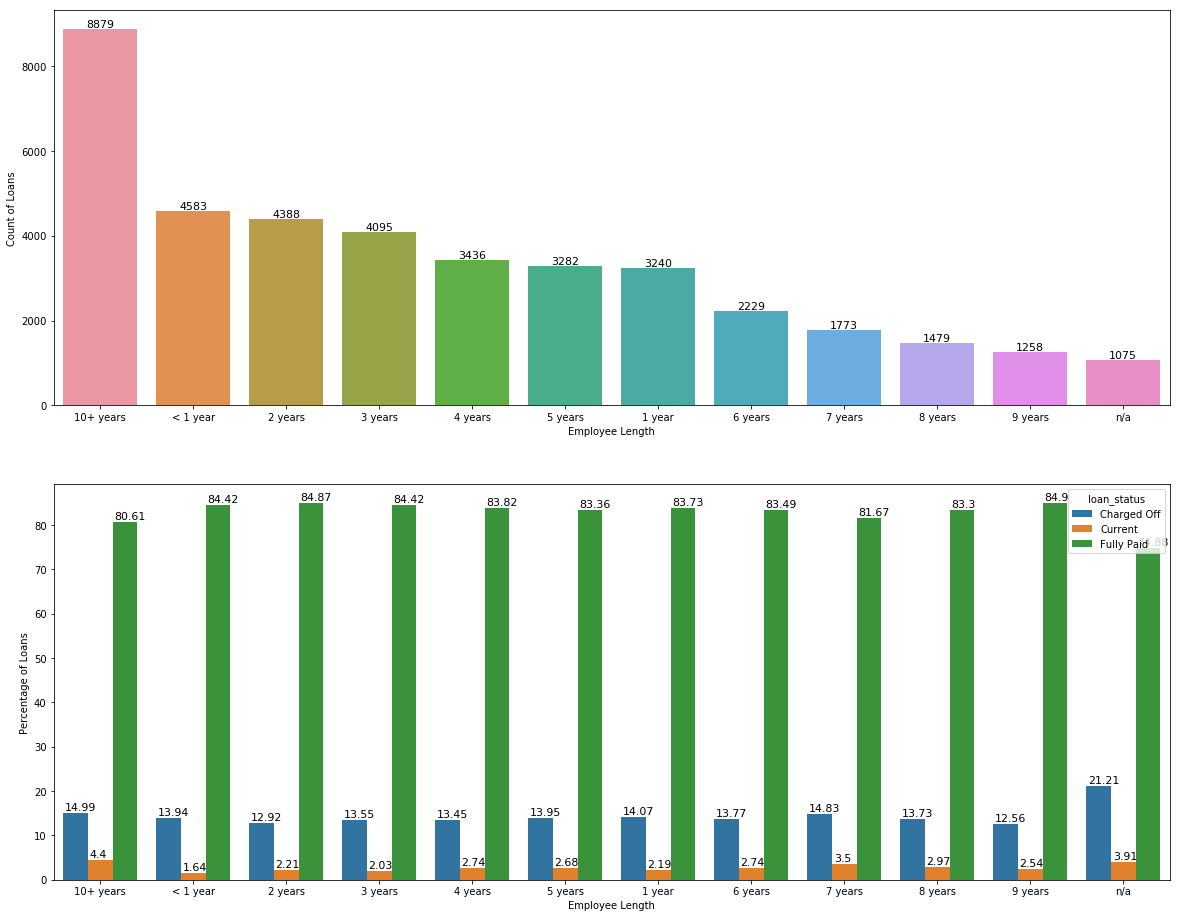

In [41]:
# Plots for emp_length Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(20,16))

# Plot for number of loans given for each emp_length.
plt.subplot(2,1,1)
ax = sns.countplot(x='emp_length', data=loan, order=loan['emp_length'].value_counts().index)
ax.set(xlabel = 'Employee Length', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)

# Plot for Percentage of Loans given for each emp_length and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='emp_length', y='id',hue='loan_status', data=loanstatus_emplength_per
               ,order=loan['emp_length'].value_counts().index) 
ax.set(xlabel = 'Employee Length', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+0.6, i.get_height(), fontsize=11)

plt.show()

#### From the above plots we can see there is no pattern for percentage of Charged off loans against Employee Length (emp_length)
So we can say __Employee Length(emp_length)__ is not a __Driving variable for defaulted loans.__

### For Home_ownership Column

In [42]:
# Calculating frequency for each home_ownership value
homeown_freq = loan.groupby(['home_ownership'])['id'].count()
print(homeown_freq)

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
Name: id, dtype: int64


In [43]:
# Removing rows having 'home_ownership' = 'NONE' as it doesn't affect analysis for Charged Off loans
loan = loan.loc[~(loan['home_ownership'] == 'NONE')]

# Calculating frequency for home_ownership against all loan status
loanstatus_homeown_freq = loan.groupby(['home_ownership','loan_status'])['id'].count()
print(loanstatus_homeown_freq.head(5))
print("\n")

# Calculating Percentage for home_ownership against all loan status
loanstatus_homeown_per = loan.groupby(['home_ownership','loan_status'])['id'].count()
loanstatus_homeown_per = loanstatus_homeown_per.groupby(['home_ownership']).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_homeown_per = loanstatus_homeown_per.reset_index()
print(loanstatus_homeown_per.head(5))

home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Current          638
                Fully Paid     14694
OTHER           Charged Off       18
                Fully Paid        80
Name: id, dtype: int64


  home_ownership  loan_status     id
0       MORTGAGE  Charged Off  13.18
1       MORTGAGE      Current   3.61
2       MORTGAGE   Fully Paid  83.21
3          OTHER  Charged Off  18.37
4          OTHER   Fully Paid  81.63


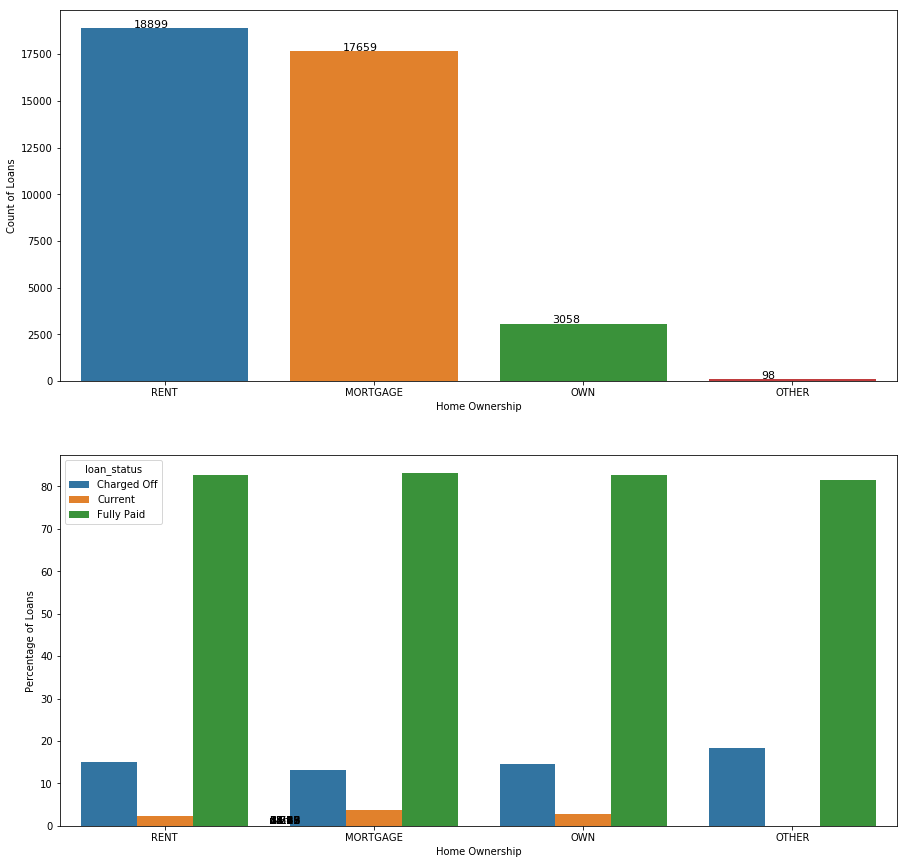

In [44]:
# Plots for home_ownership Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(15,15))

# Plot for number of loans given for home_ownership.
plt.subplot(2,1,1)
ax = sns.countplot(x='home_ownership', data=loan, order=loan['home_ownership'].value_counts().index)
ax.set(xlabel = 'Home Ownership', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans given for home_ownership and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='home_ownership', y='id',hue='loan_status', data=loanstatus_homeown_per
                ,order=loan['home_ownership'].value_counts().index ) 
ax.set(xlabel = 'Home Ownership', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan has following pattern against Home Ownership
        For Mortgage - Charged off per is 13.67%
        For Own      - Charged off per is 14.89%
        For Rent     - Charged off per is 15.36%
        For Other    - Charged off per is 18.37%

### For Verification_status Column

In [45]:
# Calculating frequency for verification_status
verifstatus_freq = loan.groupby(['verification_status'])['id'].count()
print(verifstatus_freq)

verification_status
Not Verified       16918
Source Verified     9987
Verified           12809
Name: id, dtype: int64


In [46]:
# Calculating frequency for verification_status against all loan status
loanstatus_veristatus_freq = loan.groupby(['verification_status','loan_status'])['id'].count()
print(loanstatus_veristatus_freq.head())
print("\n")

# Calculating Percentage for verification_status against all loan status
loanstatus_veristatus_per = loan.groupby(['verification_status','loan_status'])['id'].count()
loanstatus_veristatus_per = loanstatus_veristatus_per.groupby(['verification_status']).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_veristatus_per = loanstatus_veristatus_per.reset_index()
print(loanstatus_veristatus_per.head(5))

verification_status  loan_status
Not Verified         Charged Off     2142
                     Current          227
                     Fully Paid     14549
Source Verified      Charged Off     1434
                     Current          310
Name: id, dtype: int64


  verification_status  loan_status     id
0        Not Verified  Charged Off  12.66
1        Not Verified      Current   1.34
2        Not Verified   Fully Paid  86.00
3     Source Verified  Charged Off  14.36
4     Source Verified      Current   3.10


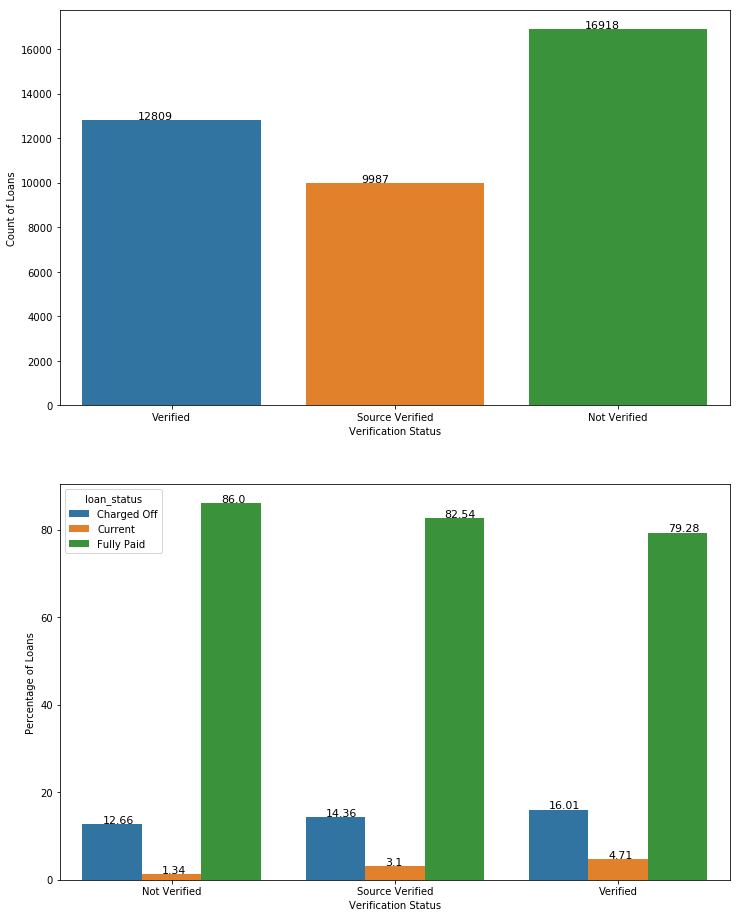

In [47]:
# Plots for verification_status Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(12,16))

# Plot for number of loans given for verification_status
plt.subplot(2,1,1)
ax = sns.countplot(x='verification_status', data=loan)
                    #, order=loan['verification_status'].value_counts().index)
ax.set(xlabel = 'Verification Status', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of Loans given in each grade and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='verification_status', y='id',hue='loan_status', data=loanstatus_veristatus_per.reset_index())
                #,order=loan['home_ownership'].value_counts().index ) 
ax.set(xlabel = 'Verification Status', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+0.2, i.get_height(), fontsize=11)

plt.show()

###### From the above plots "Charged Off" loan has following pattern against Income verification Status
        For Not Verified     - Charged off per is 12.66%
        For Source Verified  - Charged off per is 14.36%
        For Verified         - Charged off per is 16.01%
We can see from the plot that chances of loan getting defaulted increases as follows 
        __income not verified < income source verified < income verified__

### For Purpose Column

In [48]:
# Calculating frequency for purpose of loan
purpose_freq = loan.groupby(['purpose'])['id'].count()
print(purpose_freq)

purpose
car                    1549
credit_card            5130
debt_consolidation    18640
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3991
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: id, dtype: int64


In [49]:
# Calculating frequency for purpose of loan against all loan status
loanstatus_purpose_freq = loan.groupby(['purpose','loan_status'])['id'].count()
print(loanstatus_purpose_freq.head())
print("\n")

# Calculating Percentage for purpose of loan against all loan status
loanstatus_purpose_per = loan.groupby(['purpose','loan_status'])['id'].count()
loanstatus_purpose_per = loanstatus_purpose_per.groupby(['purpose']).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_purpose_per = loanstatus_purpose_per.reset_index().sort_values(by='id')
print(loanstatus_purpose_per.head(5))

purpose      loan_status
car          Charged Off     160
             Current          50
             Fully Paid     1339
credit_card  Charged Off     542
             Current         103
Name: id, dtype: int64


             purpose loan_status    id
30  renewable_energy     Current  0.97
24            moving     Current  1.20
36          vacation     Current  1.57
18    major_purchase     Current  1.69
21           medical     Current  1.73


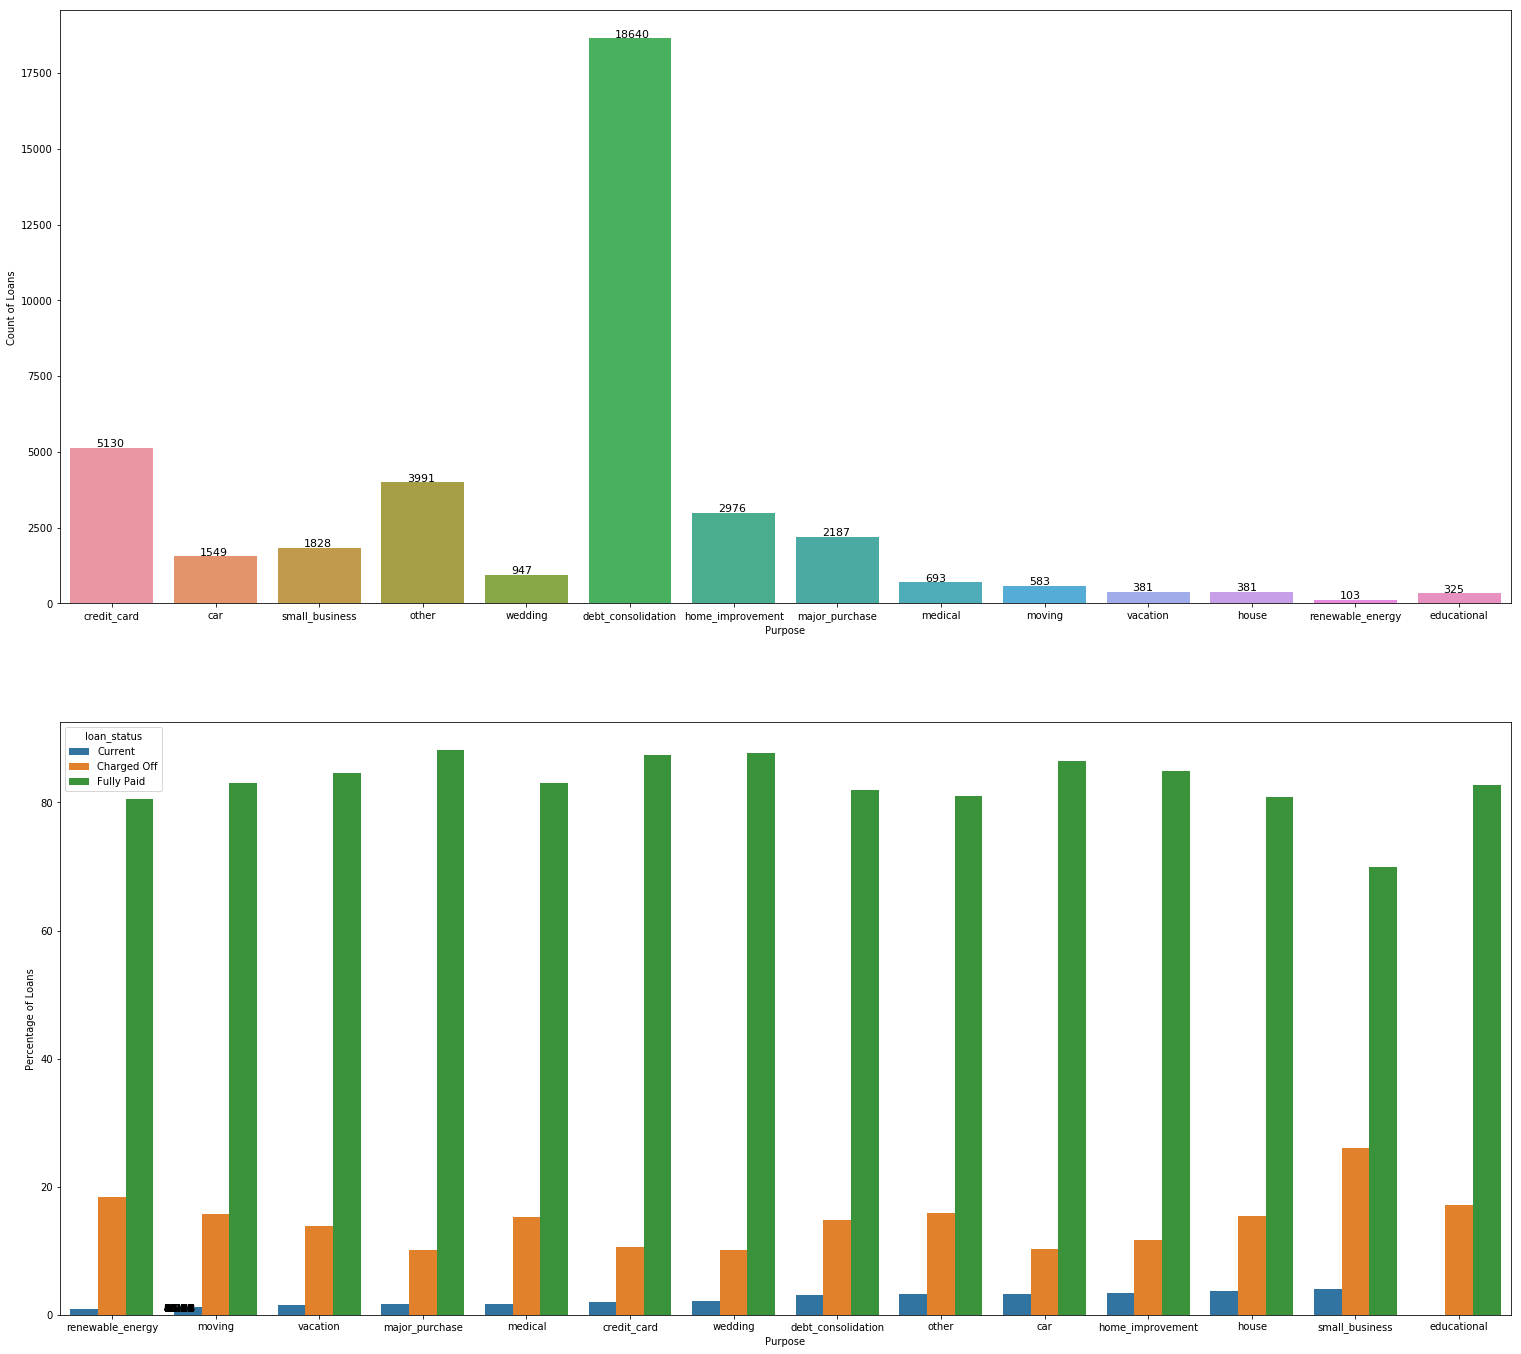

In [50]:
# Plots for purpose Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(26,24))

# Plot for number of loans given for different purpose
plt.subplot(2,1,1)
ax = sns.countplot(x='purpose', data=loan)
ax.set(xlabel = 'Purpose', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans given for different purpose and loan_status.
plt.subplot(2,1,2)
ax=sns.barplot(x='purpose', y='id',hue='loan_status', data=loanstatus_purpose_per) 
ax.set(xlabel = 'Purpose', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan has following pattern against purpose
        For major_purchase      - Charged off per is 10.33%
        For wedding             - Charged off per is 10.37%
        For car                 - Charged off per is 10.67%
        For credit_card         - Charged off per is 10.78%
        For home_improvement    - Charged off per is 12.07%
        For vacation            - Charged off per is 14.13%
        For debt_consolidation  - Charged off per is 15.33%
        For medical             - Charged off per is 15.57%
        For moving              - Charged off per is 15.97%
        For house               - Charged off per is 16.08%
        For other               - Charged off per is 16.39%
        For educational         - Charged off per is 17.23%
        For renewable_energy    - Charged off per is 18.63%
        For small_business      - Charged off per is 27.08%
We can see that chances for loan get __Charged Off__ are distributed as follows when<br> 
        Loan given for __small_business__ is highest - __27.08%__<br>
        Loan given for __renewable_enery (18.63%)__ and __educational (17.23%)__ is also on higher side<br>
        <br>
        Loan given for __house (16.08%)__ , __moving (15.97%)__ , __medical (15.57%)__ and __debt_consolidation (15.33%)__ is moderate<br>
        Loan given for __credit_card (10.78%)__ , __car (10.67%)__ and __wedding (10.37%)__ performs better<br>
        

In [51]:
purpose_Vs_loan_status = pd.crosstab(loan['purpose'], loan['loan_status'],margins=True)
purpose_Vs_loan_status['Proportion Charged Off'] = round((purpose_Vs_loan_status['Charged Off']/purpose_Vs_loan_status['All']),3)*100
purpose_Vs_loan_status

loan_status,Charged Off,Current,Fully Paid,All,Proportion Charged Off
purpose,,,,,
car,160,50,1339,1549,10.3
credit_card,542,103,4485,5130,10.6
debt_consolidation,2767,586,15287,18640,14.8
educational,56,0,269,325,17.2
home_improvement,347,101,2528,2976,11.7
house,59,14,308,381,15.5
major_purchase,222,37,1928,2187,10.2
medical,106,12,575,693,15.3
moving,92,7,484,583,15.8


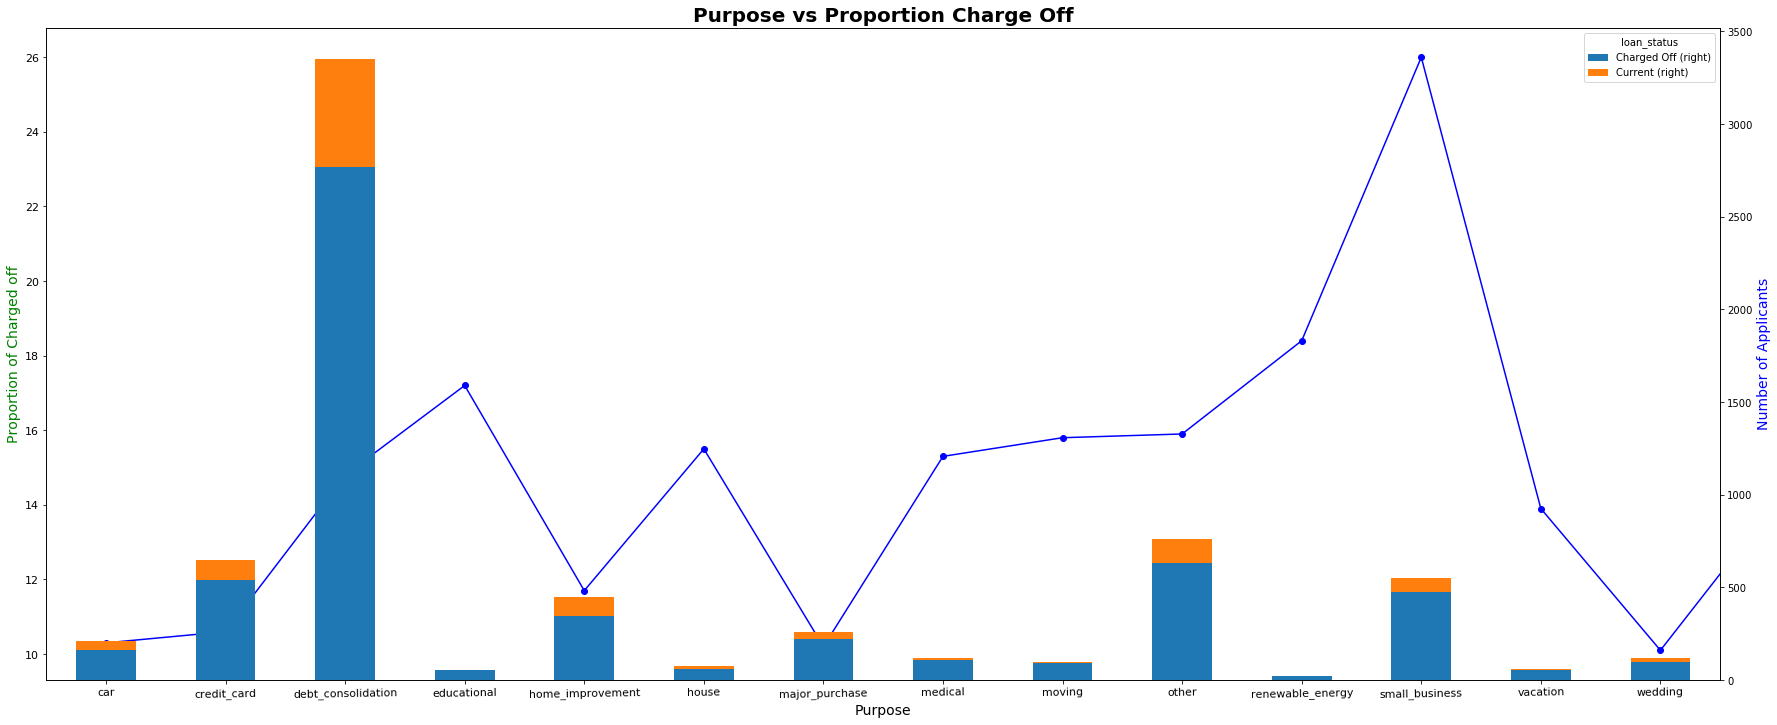

In [52]:
lineplot = purpose_Vs_loan_status['Proportion Charged Off']
barplot = purpose_Vs_loan_status.iloc[0:14,0:2]
purpose_Vs_loan_status.iloc[:,0:0].index
ax = lineplot.plot(figsize=(30,8), marker='o',color = 'b')
ax2 = barplot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked='stacked',figsize=(30,12),fontsize=11)
ax.set_title('Purpose'' vs Proportion Charge Off',fontsize=20,weight="bold")
ax.set_xlabel('Purpose',fontsize=14)
ax.set_ylabel('Proportion of Charged off',color = 'g',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'b',fontsize=14)
plt.show()

### For addr_state Column

In [53]:
# Calculating frequency for addr_state of loan
addr_state_freq = loan.groupby(['addr_state'])['id'].count()
print(addr_state_freq.head(10))

addr_state
AK      80
AL     452
AR     245
AZ     879
CA    7098
CO     792
CT     751
DC     214
DE     114
FL    2866
Name: id, dtype: int64


In [54]:
# Calculating frequency for addr_state against all loan status
loanstatus_addrstate_freq = loan.groupby(['addr_state','loan_status'])['id'].count()
print(loanstatus_addrstate_freq.head())
print("\n")

# Calculating Percentage for purpose of loan against all loan status
loanstatus_addrstate_per = loan.groupby(['addr_state','loan_status'])['id'].count()
loanstatus_addrstate_per = loanstatus_addrstate_per.groupby(['addr_state']).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_addrstate_per = loanstatus_addrstate_per.reset_index().sort_values(by='id')
print(loanstatus_addrstate_per.head(5))

addr_state  loan_status
AK          Charged Off    15
            Current         2
            Fully Paid     63
AL          Charged Off    54
            Current        17
Name: id, dtype: int64


    addr_state loan_status    id
25          DE     Current  0.88
22          DC     Current  1.40
63          MN     Current  1.63
126         VT     Current  1.85
106         RI     Current  2.02


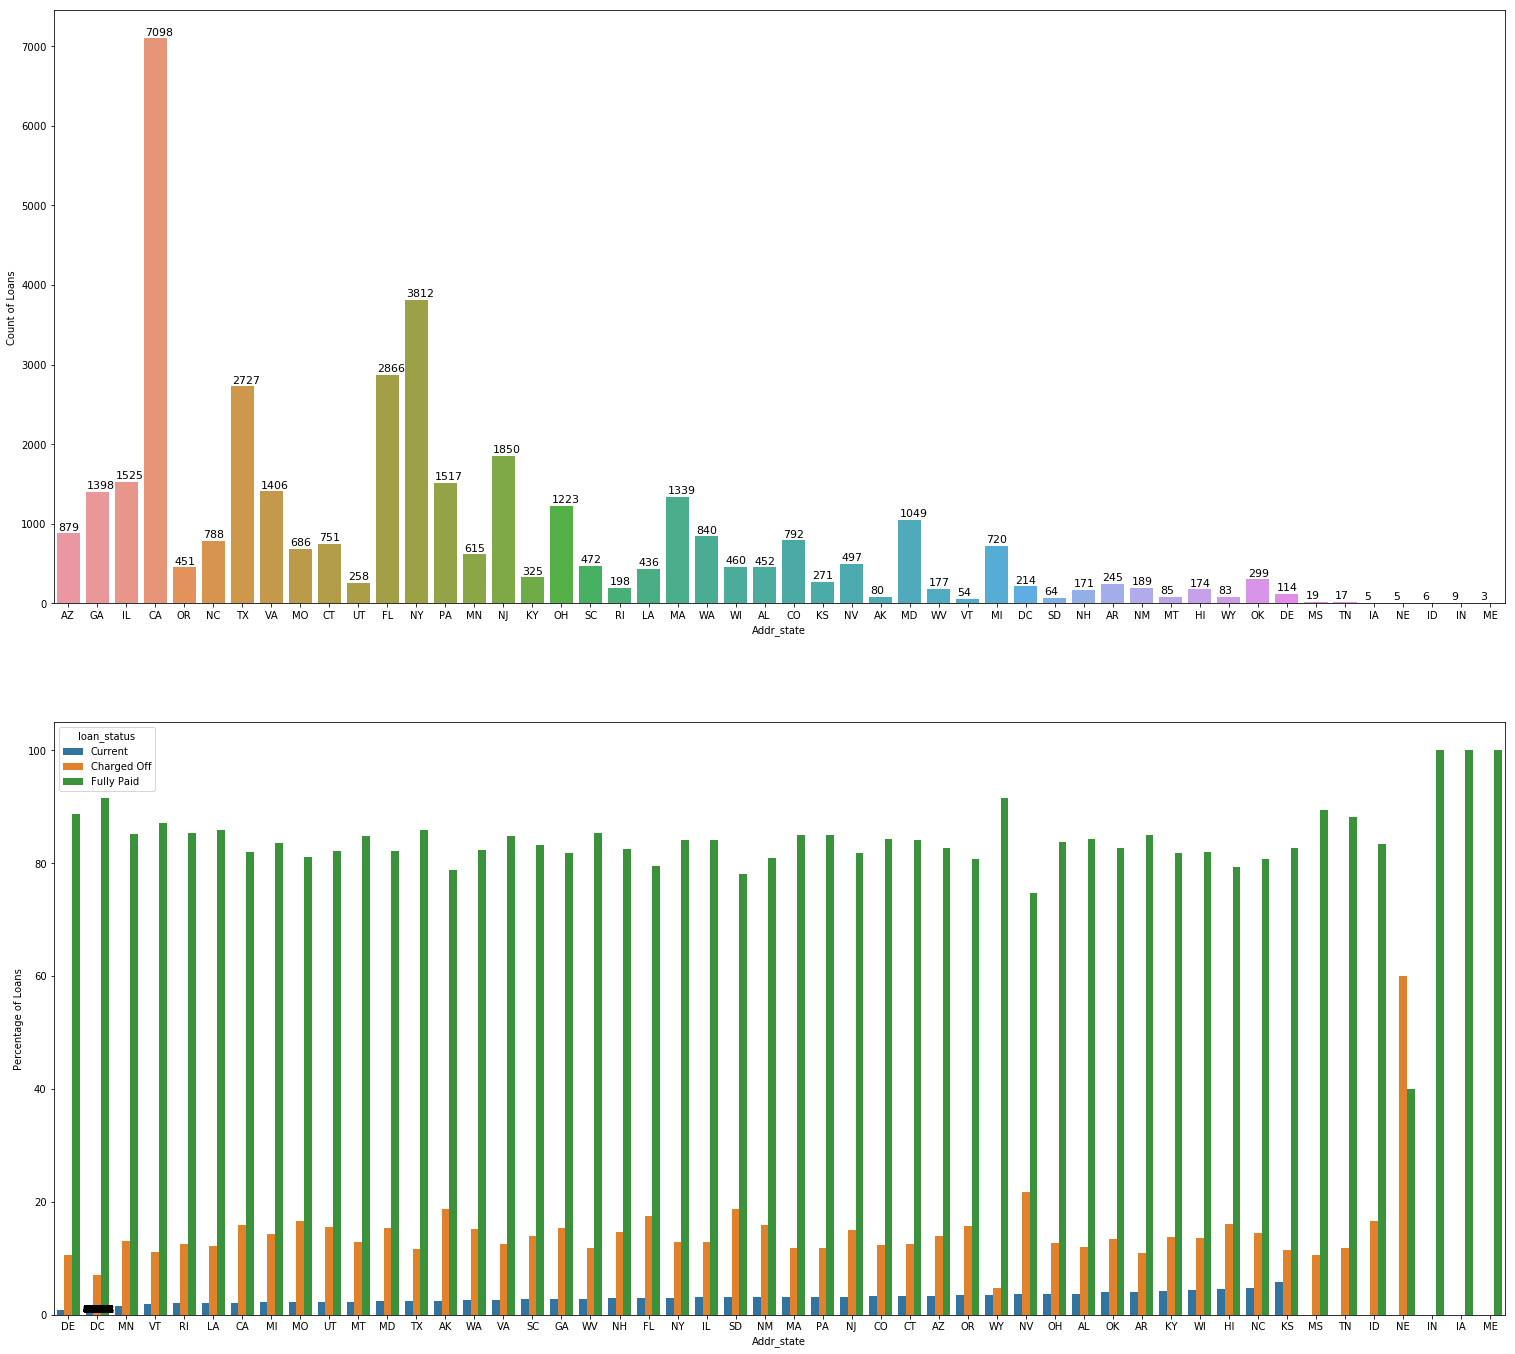

In [55]:
# Plots for addr_state Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(26,24))

# Plot for number of loans given for different purpose
plt.subplot(2,1,1)
ax = sns.countplot(x='addr_state', data=loan)
ax.set(xlabel = 'Addr_state', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans given for different purpose and loan_status.
plt.subplot(2,1,2)
ax=sns.barplot(x='addr_state', y='id',hue='loan_status', data=loanstatus_addrstate_per) 
ax.set(xlabel = 'Addr_state', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### We can see from above plots that:
    The rate of loan getting rejected is as follows in decreasing order from left to right
    Nebraska(NE) > Nevada(NV) > South Dakota (SD) > Alaska(AK) and so on

# Segmented Univariate Analysis

### For Loan_amnt column

In [56]:
# Inspecting loan_amnt column
loan.loan_amnt.describe()

count    39714.000000
mean     11219.868308
std       7456.742123
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

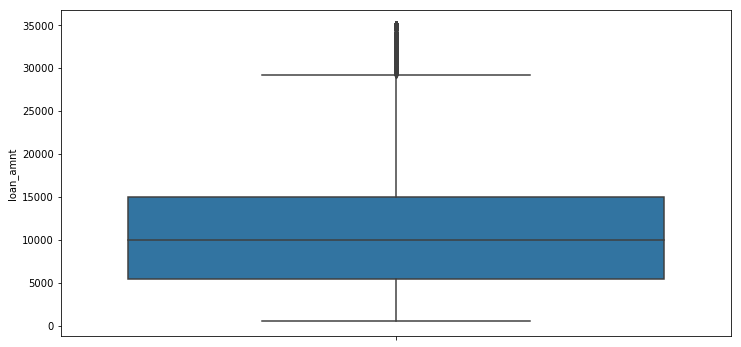

In [57]:
# Plotting Box plot for loan_amnt Column
plt.figure(figsize = (12,6))
sns.boxplot(y="loan_amnt", data=loan)
plt.show()

__loan_amnt__ ranges between __500__ and __35000__. <br>
So segmenting the loan_amnt in range of __0 to 35000__ with __5000__ increment

In [58]:
# Segmenting loan_amnt into different ranges like 0-5000, 5000-10000 etc 
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], range(0, 40000, 5000), right=False, include_lowest=True)

# Calculating % of loan_amnt and loan_status
loanstatus_loanamnt =loan.groupby(['loan_amnt_bin','loan_status']).id.count()
loanstatus_loanamnt_per = loanstatus_loanamnt.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_loanamnt_per = loanstatus_loanamnt_per.reset_index()
loanstatus_loanamnt_per.head(5)

,loan_amnt_bin,loan_status,id
0,"[0, 5000)",Charged Off,13.67
1,"[0, 5000)",Current,0.97
2,"[0, 5000)",Fully Paid,85.36
3,"[5000, 10000)",Charged Off,12.87
4,"[5000, 10000)",Current,1.29


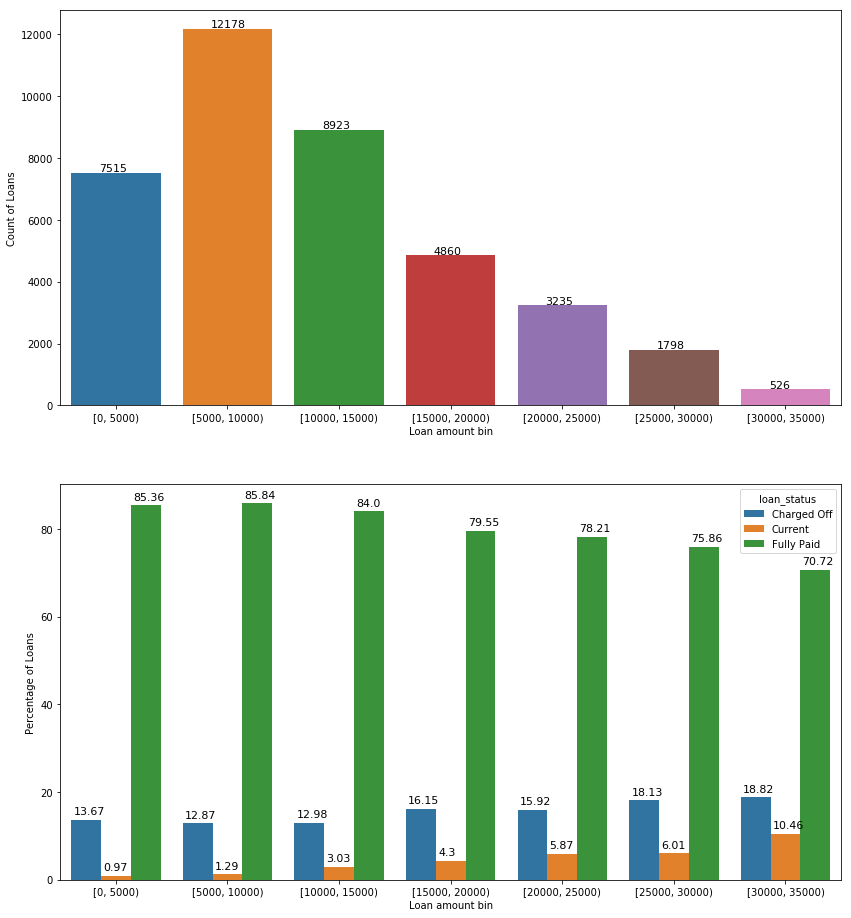

In [59]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,16))

# Plot for number of loans to loan_amnt .
plt.subplot(2,1,1)
ax = sns.countplot(x='loan_amnt_bin', data=loan)
ax.set(xlabel = 'Loan amount bin', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans to loan_amnt and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='loan_amnt_bin', y='id',hue='loan_status', data=loanstatus_loanamnt_per) 
ax.set(xlabel = 'Loan amount bin', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+1.2, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan loan_amnt has following pattern
        For 0-5000          - Charged off per is 13.67%
        For 5000-10000      - Charged off per is 12.87%
        For 10000-15000     - Charged off per is 12.98%
        For 15000-20000     - Charged off per is 16.15%
        For 20000-25000     - Charged off per is 15.92%
        For 25000-30000     - Charged off per is 18.13%
        For 30000-35000     - Charged off per is 18.82%
We can see that as the loan_amnt increases, sometimes the number of loan defaulted also increases.<br>
<br>
For __loan_amnt more than 20000__, the chances of loan getting defaulted increases.<br>
For __loan_amnt less than 20000__, there is no fixed pattern of loan getting charged off.


### For int_rate column

In [60]:
# Inspecting int_rate column
loan.int_rate.describe()

count    39714.000000
mean        12.021428
std          3.724848
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

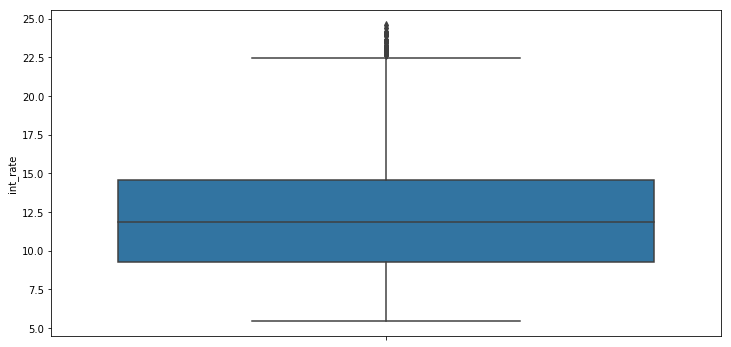

In [61]:
# Plotting Box plot for int_rate Column
plt.figure(figsize = (12,6))
sns.boxplot(y="int_rate", data=loan)
plt.show()

#### From the above inspection
The range of __int_rate__ lies between __5.42 and 24.59__.<br>
So segmenting the __int_rate into different segment__ in range of __5 to 30__ with increment of __5__ like 5-10, 10-15 etc.

In [62]:
# Segmenting int_rate into different ranges 5-10,10-15 etc
loan['int_rate_bin'] = pd.cut(loan['int_rate'], range(5, 30, 5), right=False, include_lowest=True)

# Calculating % of loan_amnt and loan_status
loanstatus_intrate =loan.groupby(['int_rate_bin','loan_status']).id.count()
loanstatus_intrate_per = loanstatus_intrate.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_intrate_per = loanstatus_intrate_per.reset_index()
loanstatus_intrate_per.head(5)

,int_rate_bin,loan_status,id
0,"[5, 10)",Charged Off,6.58
1,"[5, 10)",Current,0.62
2,"[5, 10)",Fully Paid,92.80
3,"[10, 15)",Charged Off,14.38
4,"[10, 15)",Current,2.79


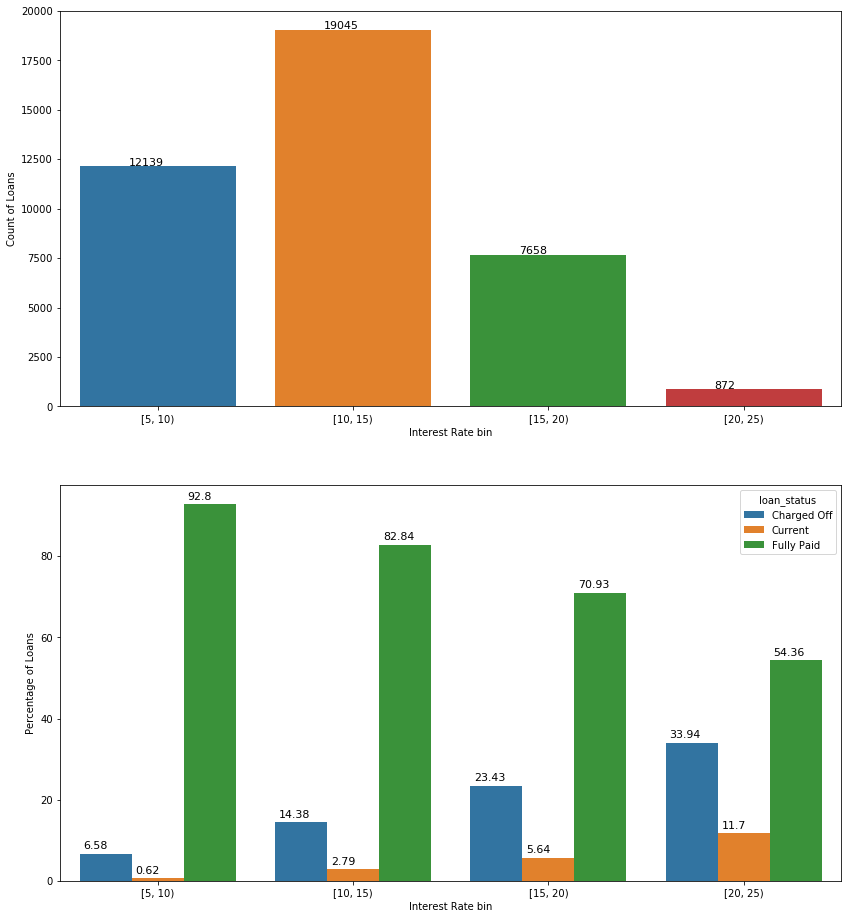

In [63]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,16))

# Plot for number of loans given against different interest rates.
plt.subplot(2,1,1)
ax = sns.countplot(x='int_rate_bin', data=loan)
ax.set(xlabel = 'Interest Rate bin', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans given against different interest rates and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='int_rate_bin', y='id',hue='loan_status', data=loanstatus_intrate_per) 
ax.set(xlabel = 'Interest Rate bin', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+1.2, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan int_rate has following pattern
        For 5-10      - Charged off per is 6.58%
        For 10-15     - Charged off per is 14.38%
        For 15-20     - Charged off per is 23.43%
        For 20-25     - Charged off per is 33.94%
We can see that as the loan_amnt increases, the number of loan defaulted also increases.<br>
So __Interest rate(int_rate)__ is also one of __Driving Variable for Loan Default (Charged Off)__

### For installment column

In [64]:
# Inspecting int_rate column
loan.installment.describe()

count    39714.000000
mean       324.573112
std        208.877080
min         15.690000
25%        167.032500
50%        280.230000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

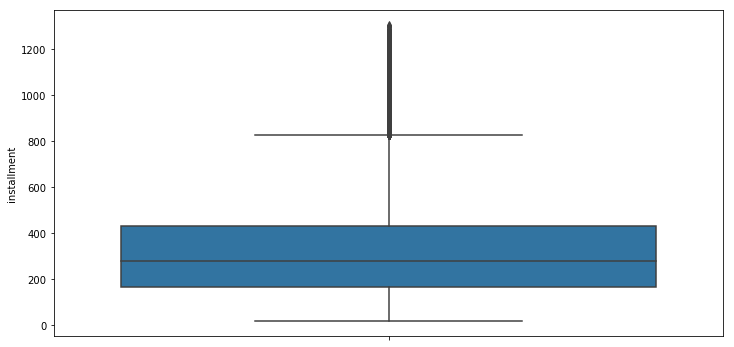

In [65]:
# Plotting Box plot for int_rate Column
plt.figure(figsize = (12,6))
sns.boxplot(y="installment", data=loan)
plt.show()

#### From the above inspection
The range of installment lies between 15.69 and 1305.19.<br>
So segmenting the __installment__ into different segment__ in range of __0 to 1400__ with increment of __200__ 
like 0-200, 200-400, 400-600 etc.

In [66]:
# Segmenting installment into different ranges like 0-200,200-400 etc
loan['installment_bin'] = pd.cut(loan['installment'], range(0, 1400, 200), right=False, include_lowest=True)

# Calculating % of installment_bin and loan_status
loanstatus_instal =loan.groupby(['installment_bin','loan_status']).id.count()
loanstatus_instal_per = loanstatus_instal.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_instal_per = loanstatus_instal_per.reset_index()
loanstatus_instal_per.head(5)

,installment_bin,loan_status,id
0,"[0, 200)",Charged Off,13.65
1,"[0, 200)",Current,1.56
2,"[0, 200)",Fully Paid,84.79
3,"[200, 400)",Charged Off,13.59
4,"[200, 400)",Current,2.89


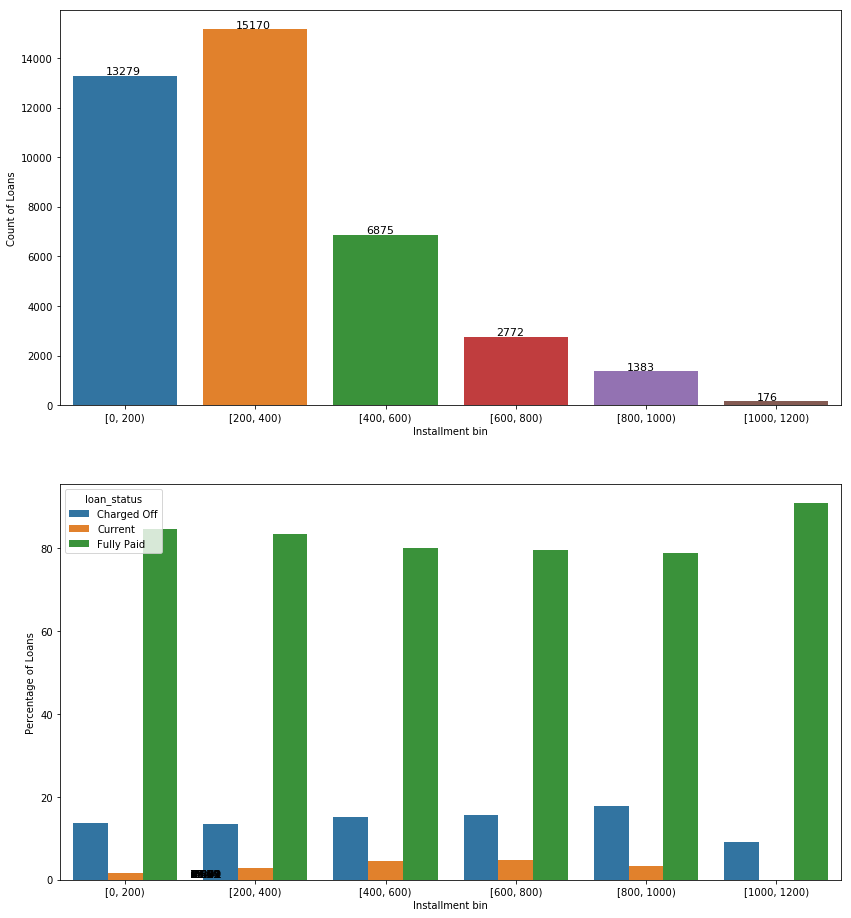

In [67]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,16))

# Plot for number of loans and installment amount.
plt.subplot(2,1,1)
ax = sns.countplot(x='installment_bin', data=loan)
ax.set(xlabel = 'Installment bin', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans and installment amount and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='installment_bin', y='id',hue='loan_status', data=loanstatus_instal_per) 
ax.set(xlabel = 'Installment bin', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan installment 
    when the amount of installment increases then installment amount follows below pattern
        (0-200) -> (200-400) -> (400-600) -> (600-800) -> (800-1000) ---> % of loan default Increases
        (1000-1200) --> % of loan default decreased because the data is not enough for this segment.
        
We can see that amount of __installment has impact__ on __loan 'Charged Off'__


### For annual_inc column

In [68]:
# Inspecting annual_inc column
loan.annual_inc.describe()

count    3.971400e+04
mean     6.896804e+04
std      6.379504e+04
min      4.000000e+03
25%      4.040450e+04
50%      5.900000e+04
75%      8.229900e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

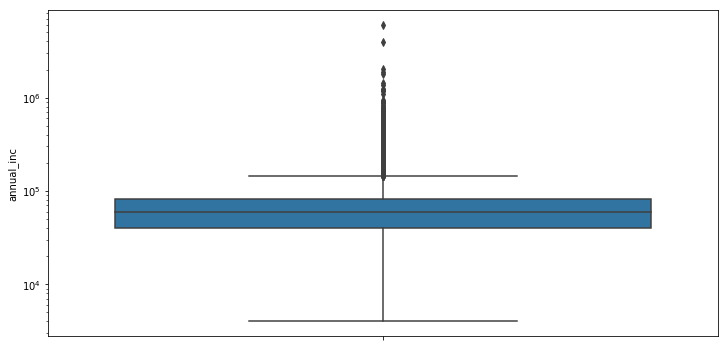

In [69]:
# Plotting Box plot for int_rate Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="annual_inc", data=loan)
ax.set_yscale('log')
plt.show()

#### Outlier Analysis for annual_inc

In [70]:
# Calculating 95% quartile for annual_inc
print(loan.annual_inc.quantile([0.95]))

# Removing outliers for above calculated quartile range
# Creating new dataframe for removed outlier so that original dataframe loan doesn't gets affected
loan_outlier_rem = loan.loc[loan['annual_inc'] <= 142000 ]

0.95    142000.0
Name: annual_inc, dtype: float64


In [71]:
# Inspecting annual_inc column
loan_outlier_rem.annual_inc.describe()

count     37740.000000
mean      61070.297657
std       27829.008145
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

#### From the above inspection
After outlier removal, the range of annual_inc lies between __4000 and 142000__.<br>
So segmenting the __annual_inc into different segment__ in range of __0 to 150000__ with 
increment of __15000__ like 0-15000,15000-30000 etc.

In [72]:
# Segmenting annual_inc into different ranges like 0-15000,15000-30000  etc
loan_outlier_rem['annual_inc_bin'] = pd.cut(loan_outlier_rem['annual_inc'], range(0, 150000, 20000)
                                                , right=False, include_lowest=True)

# Calculating % of annual_inc_bin and loan_status
loanstatus_anninc_bin =loan_outlier_rem.groupby(['annual_inc_bin','loan_status']).id.count()
loanstatus_anninc_bin_per = loanstatus_anninc_bin.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_anninc_bin_per = loanstatus_anninc_bin_per.reset_index()
loanstatus_anninc_bin_per.head(5)

,annual_inc_bin,loan_status,id
0,"[0, 20000)",Charged Off,21.29
1,"[0, 20000)",Current,0.75
2,"[0, 20000)",Fully Paid,77.95
3,"[20000, 40000)",Charged Off,17.24
4,"[20000, 40000)",Current,1.89


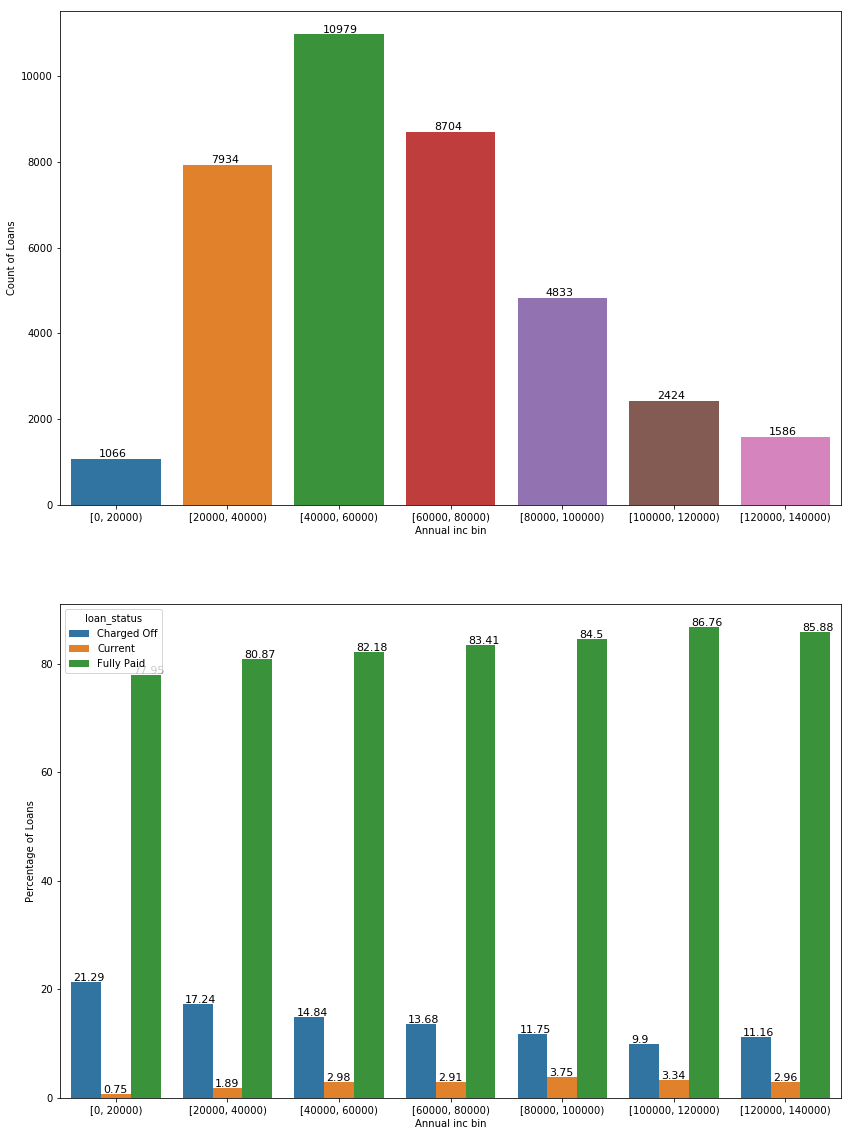

In [73]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for count of loans and annual_inc_bin.
plt.subplot(2,1,1)
ax = sns.countplot(x='annual_inc_bin', data=loan_outlier_rem)
ax.set(xlabel = 'Annual inc bin', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans for annual_inc_bin and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='annual_inc_bin', y='id',hue='loan_status', data=loanstatus_anninc_bin_per) 
ax.set(xlabel = 'Annual inc bin', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+0.2, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan annual_inc has following pattern
        For 0-20000          - Charged off per is 21.29%
        For 20000-40000      - Charged off per is 17.24%
        For 40000-60000      - Charged off per is 14.84%
        For 60000-80000      - Charged off per is 13.68%
        For 60000-100000     - Charged off per is 11.75%
        For 100000-120000    - Charged off per is 9.90%
        For 120000-140000    - Charged off per is 11.16%
The above pattern shows that when borrower has low annual income the chances of loan default is high.<br>
So __Annual Income(annual_inc)__ is also one of __Driving Variable for Loan Default (Charged Off)__

### For dti column

In [74]:
# Inspecting dti column
loan.dti.describe()

count    39714.000000
mean        13.315248
std          6.678712
min          0.000000
25%          8.172500
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

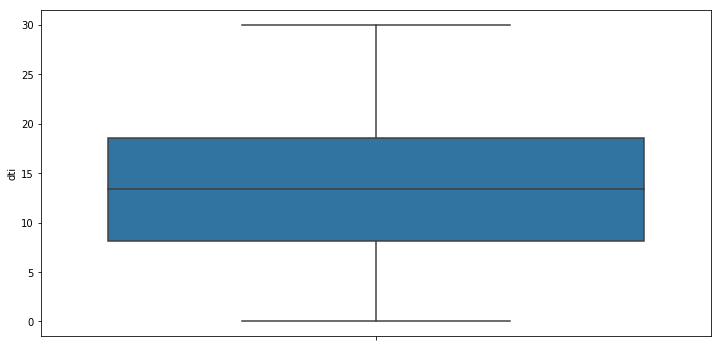

In [75]:
# Plotting Box plot for dti Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="dti", data=loan)
plt.show()

#### From the above inspection
The range of dti lies between __0 and 29.99__.<br>
So segmenting the __dti into different segment__ in range of __0 to 30__ with increment of __5__ like 0-5,5-10, 10-15 etc.

In [76]:
# Segmenting dti into different ranges like 0-5,5-10,10-15 etc
loan['dti_bin'] = pd.cut(loan['dti'], range(0, 35, 5), right=False, include_lowest=True)

# Calculating % of dti and loan_status
loanstatus_dti =loan.groupby(['dti_bin','loan_status']).id.count()
loanstatus_dti_per = loanstatus_dti.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_dti_per = loanstatus_dti_per.reset_index()
loanstatus_dti_per.head(5)

,dti_bin,loan_status,id
0,"[0, 5)",Charged Off,12.16
1,"[0, 5)",Current,1.87
2,"[0, 5)",Fully Paid,85.97
3,"[5, 10)",Charged Off,12.42
4,"[5, 10)",Current,2.49


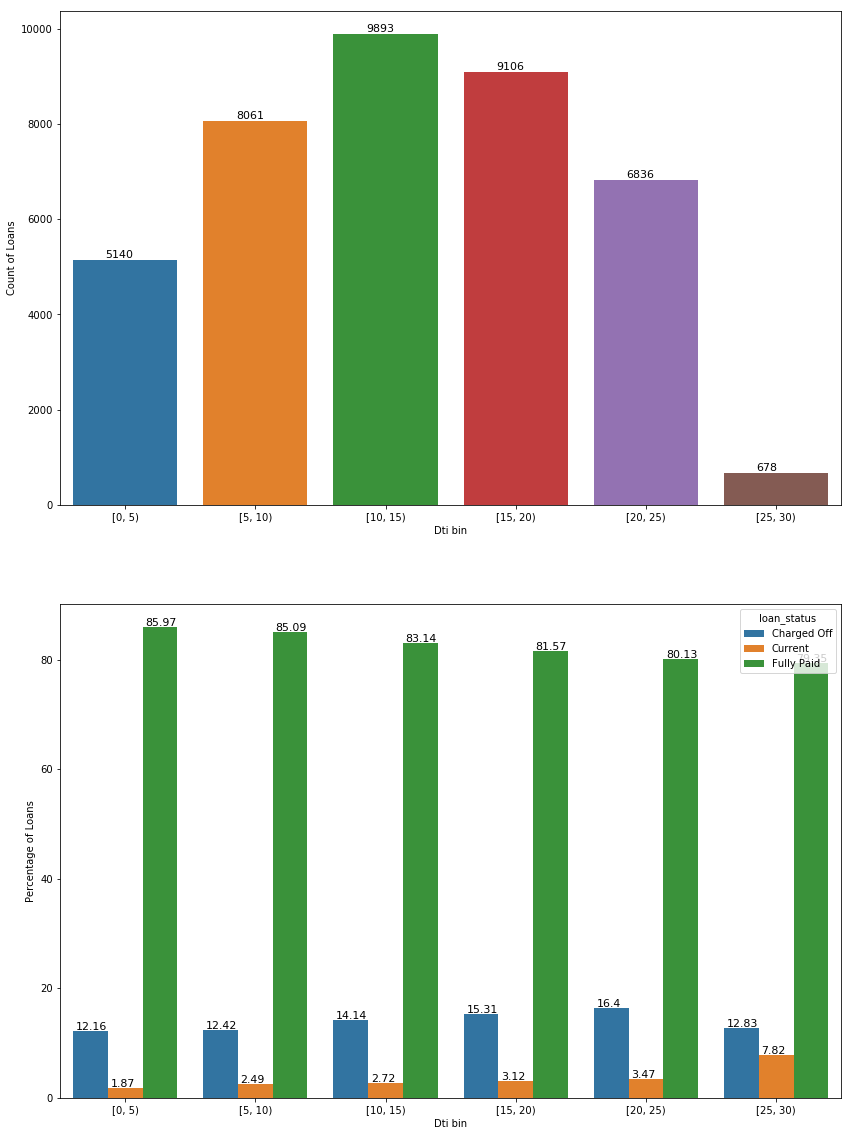

In [77]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for number of loans and dti.
plt.subplot(2,1,1)
ax = sns.countplot(x='dti_bin', data=loan)
ax.set(xlabel = 'Dti bin', ylabel = 'Count of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans and dti and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='dti_bin', y='id',hue='loan_status', data=loanstatus_dti_per) 
ax.set(xlabel = 'Dti bin', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+0.2, i.get_height(), fontsize=11)

plt.show()

#### From the above plots "Charged Off" loan installment has following pattern
        For 0-5    - Charged off per is 12.16%
        For 5-10   - Charged off per is 12.42%
        For 10-15  - Charged off per is 14.14%
        For 15-20  - Charged off per is 15.31%
        For 20-25  - Charged off per is 16.40%
        For 25-30  - Charged off per is 12.83% - 
        For 25-30 is low as compared to others but this is because there is not enough data for this bracket as compared to other segment. But despite of that the % is significant.
We can see that when dti(debt to income ratio) increases the percentage of loan defaulted(Charged off) also increase.<br>
So __dti(debt_to_income) ratio__ is also one of __Driving Variable for Loan Default (Charged Off)__

### For delinq_2yrs Column

In [78]:
# Inspecting delinq_2yrs column
loan.delinq_2yrs.describe()

count    39714.000000
mean         0.146523
std          0.491828
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

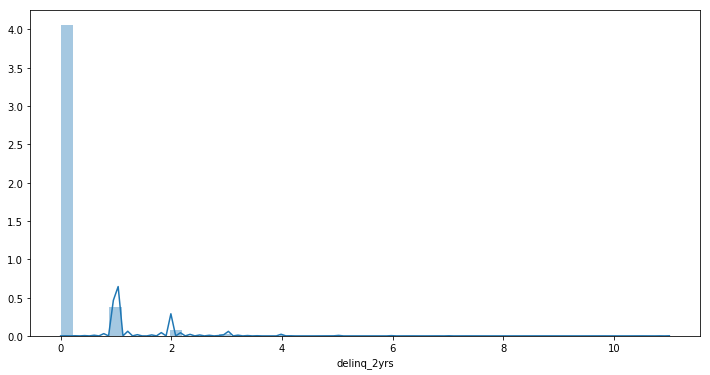

In [79]:
# Plotting Box plot for delinq_2yrs Column
plt.figure(figsize = (12,6))
ax = sns.distplot(loan.delinq_2yrs)
plt.show()

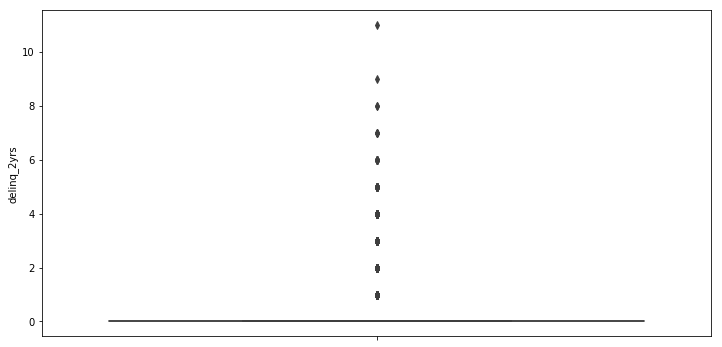

In [80]:
# Plotting Box plot for delinq_2yrs Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="delinq_2yrs", data=loan)
plt.show()

In [81]:
# Grouping delinq_2yrs values for each loan_status
loanstatus_delinq_2yrs =loan.groupby(['delinq_2yrs','loan_status']).id.count()

# Calculating % for delinq_2yrs against loan_status
loanstatus_delinq_2yrs_per = loanstatus_delinq_2yrs.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_delinq_2yrs_per = loanstatus_delinq_2yrs_per.reset_index()
loanstatus_delinq_2yrs_per.head(5)

,delinq_2yrs,loan_status,id
0,0,Charged Off,13.94
1,0,Current,2.88
2,0,Fully Paid,83.18
3,1,Charged Off,15.35
4,1,Current,2.91


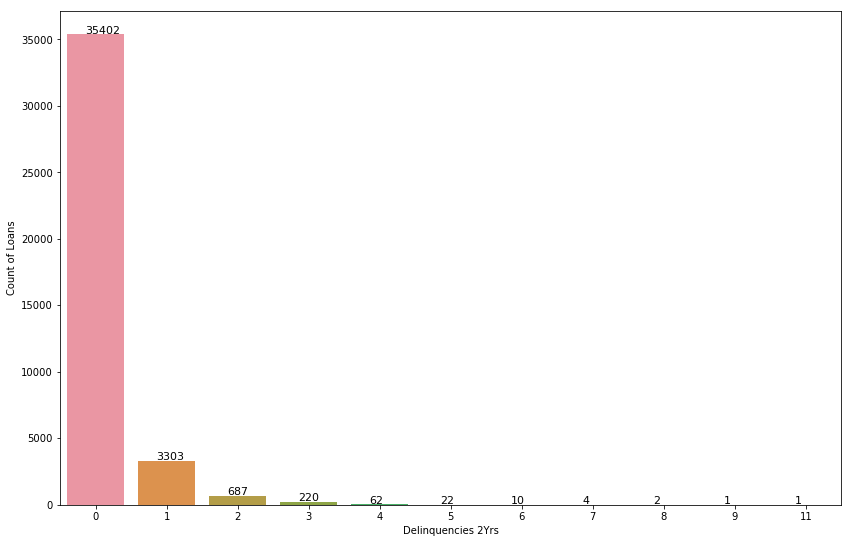

In [82]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for number of loans and delinq_2yrs.
plt.subplot(2,1,1)
ax = sns.countplot(x='delinq_2yrs', data=loan)
ax.set(xlabel = 'Delinquencies 2Yrs', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)

plt.show()

From the above plot we can see the number of delinq_2yrs has few values for 2-11, so we can merge it into segment of __2+__.

In [83]:
# Since very less number of values present greater than 2, Segmenting the greater than  equal to 2 as 2+ 
loan['delinq_2yrs_bin'] = loan['delinq_2yrs'].apply(lambda x: '2+' if (x >=2) else x)

# Grouping delinq_2yrs values for each loan_status
loanstatus_delinq_bin_2yrs =loan.groupby(['delinq_2yrs_bin','loan_status']).id.count()

# Calculating % for delinq_2yrs against loan_status
loanstatus_delinq_bin_2yrs_per = loanstatus_delinq_bin_2yrs.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_delinq_bin_2yrs_per = loanstatus_delinq_bin_2yrs_per.reset_index()
loanstatus_delinq_bin_2yrs_per.head(5)

,delinq_2yrs_bin,loan_status,id
0,0,Charged Off,13.94
1,0,Current,2.88
2,0,Fully Paid,83.18
3,1,Charged Off,15.35
4,1,Current,2.91


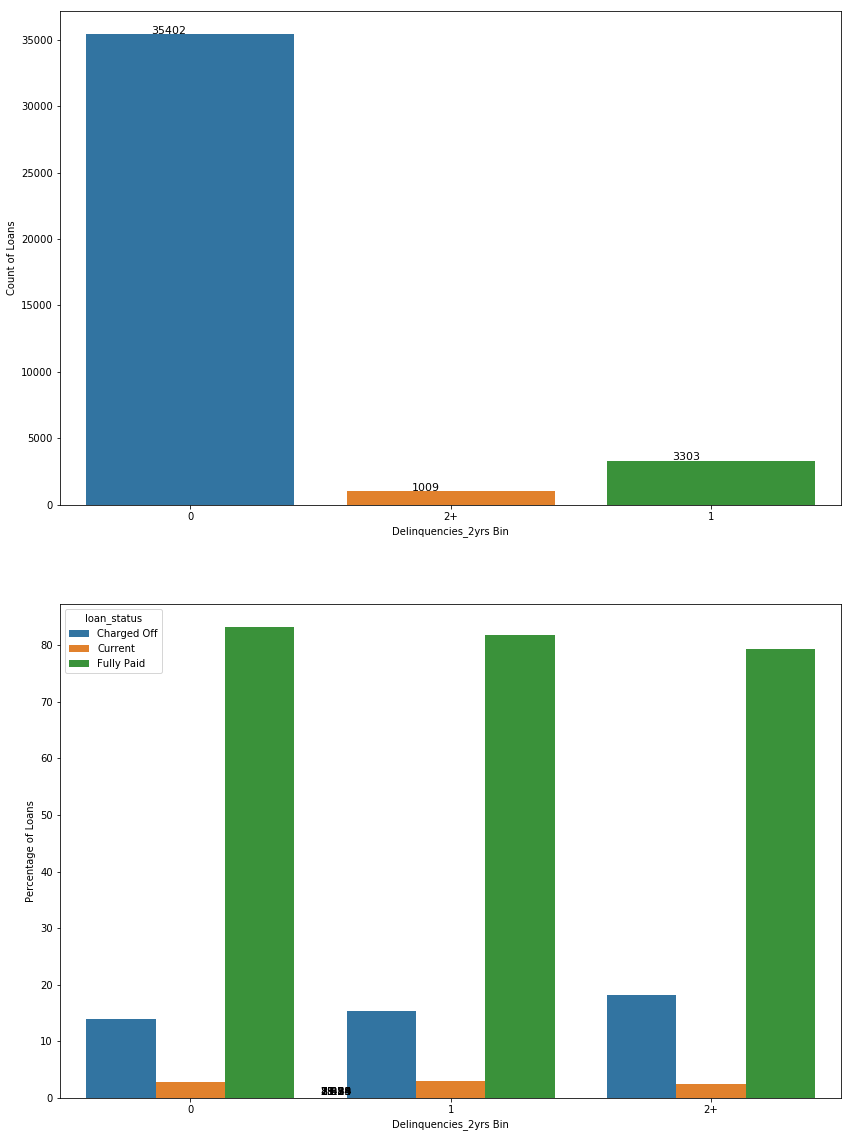

In [84]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for count of loans and delinq_2yrs_bin .
plt.subplot(2,1,1)
ax = sns.countplot(x='delinq_2yrs_bin', data=loan)
ax.set(xlabel = 'Delinquencies_2yrs Bin', ylabel = 'Count of Loans')

# Adding count of request to bars
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of Loans given in each grade and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='delinq_2yrs_bin', y='id',hue='loan_status', data=loanstatus_delinq_bin_2yrs_per) 
ax.set(xlabel = 'Delinquencies_2yrs Bin', ylabel = 'Percentage of Loans')

#Adding count of request to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

__delinq_2yrs__-The number of 30+ days past-due incidences of delinquency in the borrowers credit file for the past 2 years.<br>
<br>
From the above plot we can see that <br>
    If __delinq_2yrs__ > 2 i.e if there are 2 and more incidences of delinquency in borrowers credit file for past two years 
    __more is the possibility of loan getting Charged Off__

So, __delinq_2yrs__ is among one of the __Driving Variable for Loan Default (Charged Off)__


### For open_acc Column

In [85]:
# Inspecting open_acc column
loan.open_acc.describe()

count    39714.000000
mean         9.294581
std          4.400386
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

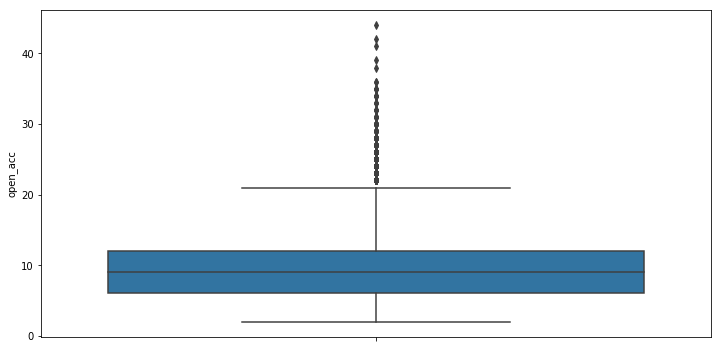

In [86]:
# Plotting Box plot for open_acc column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="open_acc", data=loan)
plt.show()

#### From the above inspection
The range of open_acc lies between __2 and 44__.<br>
So segmenting the __open_acc into different segment__ in range of __0 to 45__ with increment of __10__ like 0-10,10-20 etc.

In [87]:
# Segmenting open_acc into different ranges like 0-10,10-20 etc
loan['open_acc_bin'] = pd.cut(loan['open_acc'], range(0, 50, 10), right=False, include_lowest=True)

# Calculating % of open_acc_bin and loan_status
loanstatus_open_acc =loan.groupby(['open_acc_bin','loan_status']).id.count()
loanstatus_open_acc_per = loanstatus_open_acc.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_open_acc_per = loanstatus_open_acc_per.reset_index()
loanstatus_open_acc_per.head(5)

,open_acc_bin,loan_status,id
0,"[0, 10)",Charged Off,14.36
1,"[0, 10)",Current,2.53
2,"[0, 10)",Fully Paid,83.10
3,"[10, 20)",Charged Off,13.81
4,"[10, 20)",Current,3.33


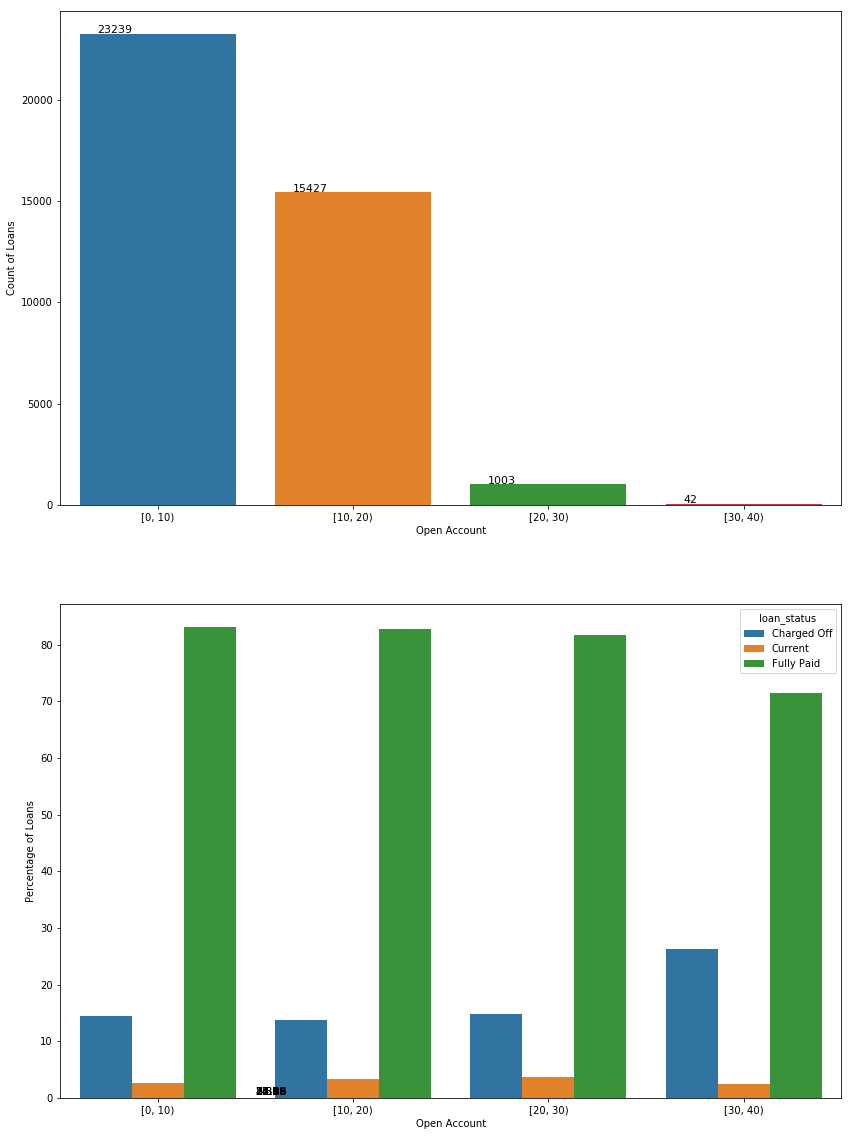

In [88]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for number of loans against open_acc_bin.
plt.subplot(2,1,1)
ax = sns.countplot(x='open_acc_bin', data=loan)
ax.set(xlabel = 'Open Account', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans against open_acc_bin and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='open_acc_bin', y='id',hue='loan_status', data=loanstatus_open_acc_per) 
ax.set(xlabel = 'Open Account', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### open_acc - The number of open credit lines in the borrower's credit file.

#### From the above plots
We can see  that chances of loan getting defaulted increases when the number of open_acc increase i.e <br>
For open_acc the Charged Off loans follows pattern as:<br>
    __no of open_acc b/w (0-10) < no of open_acc b/w (10-20) < no of open_acc b/w (20-30) < no of open_acc b/w (30-40+)__<br>
<br>
So we can say that __open_acc__ is also among the __Driving variable for Loan default (Charged Off)__

### For pub_rec Column

In [89]:
# Inspecting pub_rec column
loan.pub_rec.describe()

count    39714.000000
mean         0.055069
std          0.237208
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

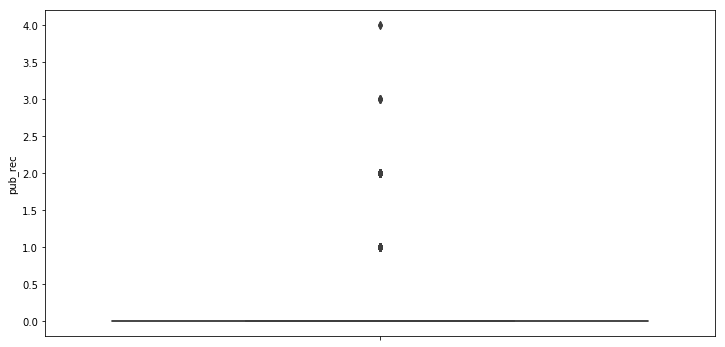

In [90]:
# Plotting Box plot for pub_rec Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="pub_rec", data=loan)
plt.show()

In [91]:
# Since very less number of values present greater than 2, Segmenting the greater than  equal to 2 as 2+ 
loan['pub_rec_bin'] = loan['pub_rec'].apply(lambda x: '2+' if (x >=2) else x)

# Calculating % of installment_bin and loan_status
loanstatus_pub_rec =loan.groupby(['pub_rec_bin','loan_status']).id.count()
loanstatus_pub_rec_per = loanstatus_pub_rec.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_pub_rec_per = loanstatus_pub_rec_per.reset_index()
loanstatus_pub_rec_per.head(5)

,pub_rec_bin,loan_status,id
0,0,Charged Off,13.72
1,0,Current,2.91
2,0,Fully Paid,83.37
3,1,Charged Off,22.23
4,1,Current,2.09


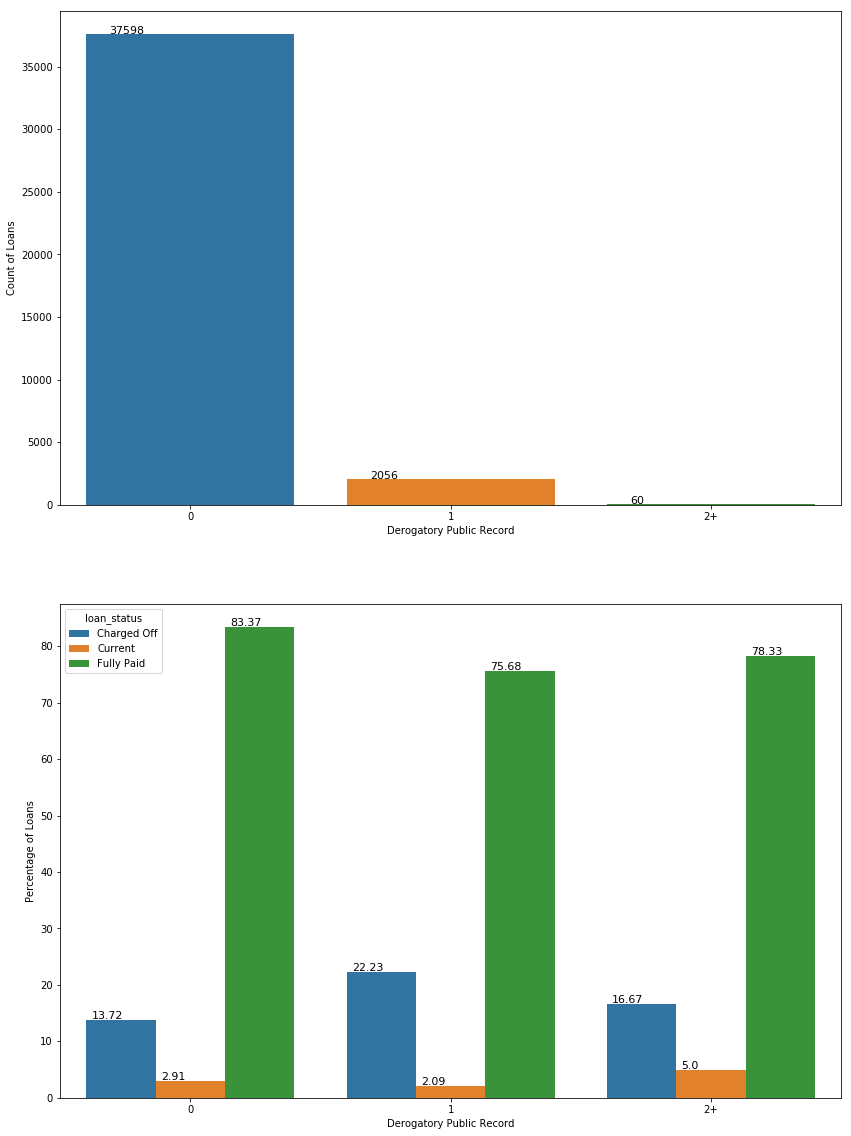

In [92]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for number of loans and pub_rec.
plt.subplot(2,1,1)
ax = sns.countplot(x='pub_rec_bin', data=loan)
ax.set(xlabel = 'Derogatory Public Record', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans for pub_rec and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='pub_rec_bin', y='id',hue='loan_status', data=loanstatus_pub_rec_per) 
ax.set(xlabel = 'Derogatory Public Record', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+0.2, i.get_height(), fontsize=11)

plt.show()

#### A derogatory record is any negative information on your credit report that lowers your credit score
pub_rec - Number of derogatory public records
If borrower has pub_rec on higher side then there is high risk of loan getting Charged Off.<br>

<br>
Although, pub_rec > 2+ showing less percentage but this is because we don't have enough data for pub_rec > 2+ or there is a possibility that very few borrower got the loan despite having pub_rec more than 2+.<br>
<br>
#### We can see from the plot that:
    For pub_rec = 0     Charged Off per is 13.72
    For pub_rec = 1     Charged Off per is 22.23
    For pub_rec = 2+    Charged Off per is 16.67 (which is high when we go through the number of loans given)
<br>
We can say that __higher the pub_rec__ more the chances of __loan getting default(charged off)__
So, we can consider __pub_rec__ as one of the __Driving variable for loan default(Chared off)__

### For revol_util Column

In [93]:
# Inspecting revol_util column
loan.revol_util.describe()

count    39714.000000
mean        48.773392
std         28.367030
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

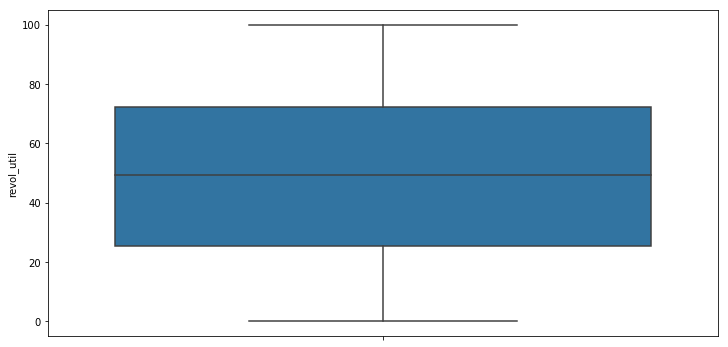

In [94]:
# Plotting Box plot for revol_util Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="revol_util", data=loan)
plt.show()

#### From the above inspection
The range of revol_util lies between __0 and 99.99__.<br>
So segmenting the __revol_util into different segment__ in range of __0 to 100__ with increment of __10__ like 0-10,10-20,20-30 etc.

In [95]:
# Segmenting installment into different ranges like 0-10,10-20,20-30 etc
loan['revol_util_bin'] = pd.cut(loan['revol_util'], range(0, 100, 10), right=False, include_lowest=True)

# Calculating % of revol_util_bin and loan_status
loanstatus_revol_util =loan.groupby(['revol_util_bin','loan_status']).id.count()
loanstatus_revol_util_per = loanstatus_revol_util.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_revol_util_per = loanstatus_revol_util_per.reset_index()
loanstatus_revol_util_per.head(5)

,revol_util_bin,loan_status,id
0,"[0, 10)",Charged Off,9.90
1,"[0, 10)",Current,1.87
2,"[0, 10)",Fully Paid,88.22
3,"[10, 20)",Charged Off,9.87
4,"[10, 20)",Current,2.10


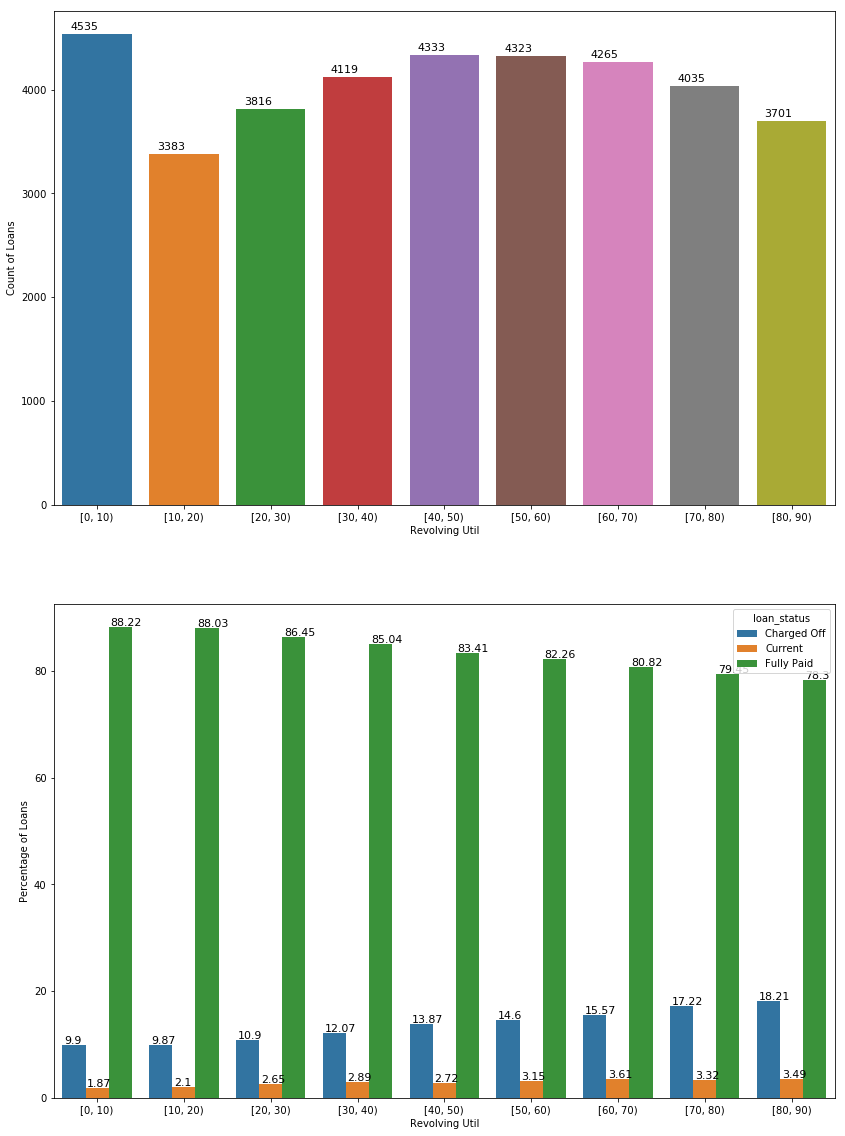

In [96]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for count of loans and revol_util_bin
plt.subplot(2,1,1)
ax = sns.countplot(x='revol_util_bin', data=loan)
ax.set(xlabel = 'Revolving Util', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans for revol_util_bin and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='revol_util_bin', y='id',hue='loan_status', data=loanstatus_revol_util_per) 
ax.set(xlabel = 'Revolving Util', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.02, i.get_height()+0.2, i.get_height(), fontsize=11)

plt.show()

#### revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

#### We can see from the plot that:<br>
    For revol_util b/w (0-10)%       Charged Off per is 9.90
    For revol_util b/w (10-20)%      Charged Off per is 9.87
    For revol_util b/w (20-30)%      Charged Off per is 10.90
    For revol_util b/w (30-40)%      Charged Off per is 12.07
    For revol_util b/w (40-50)%      Charged Off per is 13.87
    For revol_util b/w (50-60)%      Charged Off per is 14.60
    For revol_util b/w (60-70)%      Charged Off per is 15.57
    For revol_util b/w (70-80)%      Charged Off per is 17.22
    For revol_util b/w (70-80)%      Charged Off per is 18.21
<br>
We can say that __higher the revol_util__ more the chances of __loan getting default(charged off)__<br>
So, we can consider __revol_util__ as one of the __Driving variable for loan default(Charged off)__


### For total_acc Column

In [97]:
# Inspecting total_acc column
loan.total_acc.describe()

count    39714.000000
mean        22.089540
std         11.401701
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

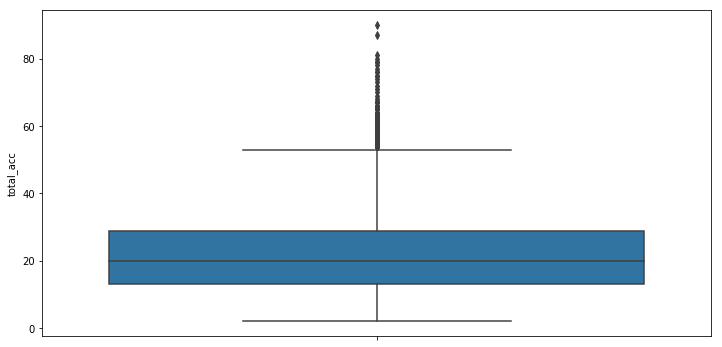

In [98]:
# Plotting Box plot for total_acc Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="total_acc", data=loan)
plt.show()

#### From the above inspection
The range of total_acc lies between __2 and 90__.<br>
So segmenting the __total_acc into different segment__ in range of __0 to 100__ with increment of __10__ like 0-10,10-20 etc.

In [99]:
# Segmenting installment into different ranges like 0-10,10-20,20-30 etc
loan['total_acc_bin'] = pd.cut(loan['total_acc'], range(0, 100, 10), right=False, include_lowest=True)

# Calculating % of total_acc_bin and loan_status
loanstatus_total_acc=loan.groupby(['total_acc_bin','loan_status']).id.count()
loanstatus_total_acc_per = loanstatus_total_acc.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_total_acc_per = loanstatus_total_acc_per.reset_index()
loanstatus_total_acc_per.head(5)


,total_acc_bin,loan_status,id
0,"[0, 10)",Charged Off,16.62
1,"[0, 10)",Current,1.73
2,"[0, 10)",Fully Paid,81.65
3,"[10, 20)",Charged Off,14.64
4,"[10, 20)",Current,2.69


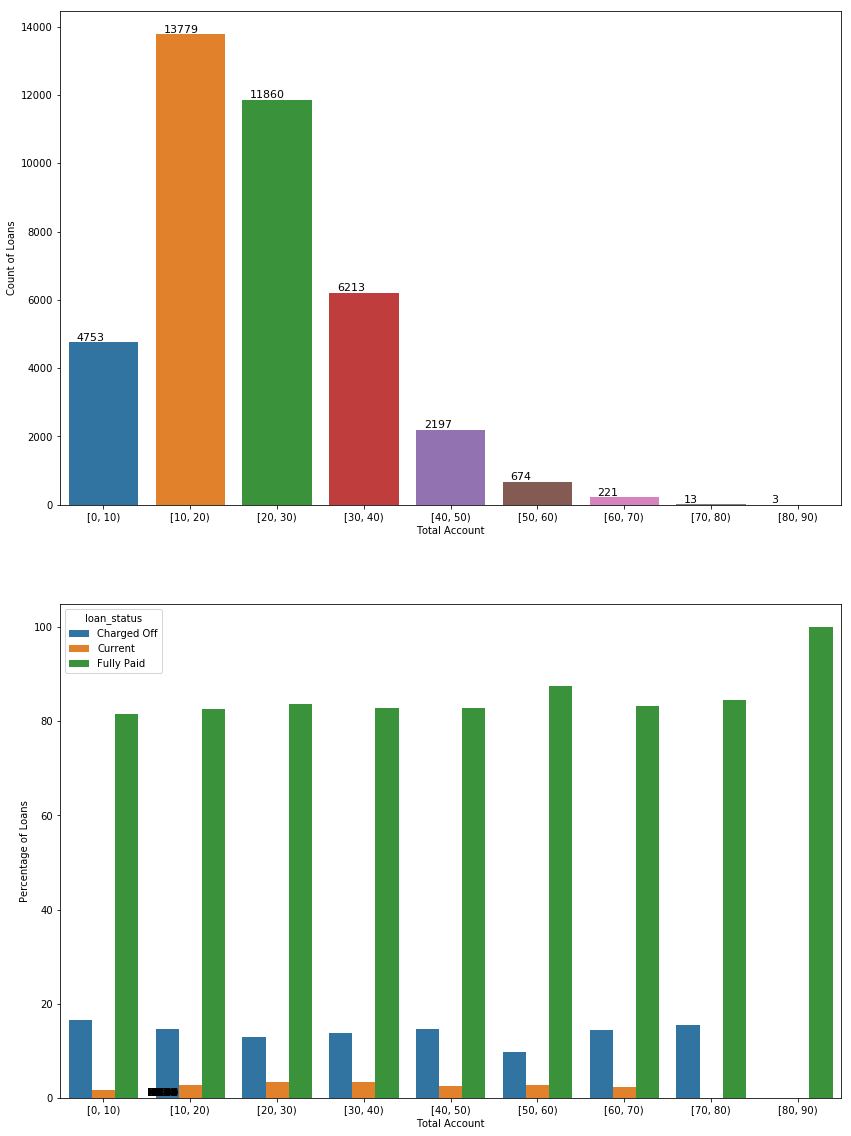

In [100]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for number of loans and total_acc_bin.
plt.subplot(2,1,1)
ax = sns.countplot(x='total_acc_bin', data=loan)
ax.set(xlabel = 'Total Account', ylabel = 'Count of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans for total_acc_bin and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='total_acc_bin', y='id',hue='loan_status', data=loanstatus_total_acc_per) 
ax.set(xlabel = 'Total Account', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### total_acc - The total number of credit lines currently in the borrower's credit file

#### From the above plots we can see there is no pattern for percentage of Charged off loans against total_acc
So we can say __total_acc__ is not a __Driving variable for defaulted loans.__

# Derived metrics Analysis

#### 1. Calculating derived metrics for installment and annual_inc column.
To check weather there is any pattern for the percentage of  installment to annual income.

In [101]:
# Derived metrics
# Installment has per month installment so multiplying it by 12 to get yearly installment. 
# annual_inc already has data for year
loan['install_to_income'] = round(100*(loan['installment']*12/loan['annual_inc']),2)
loan['install_to_income'].head(5)

0    8.14
1    2.39
2    8.26
3    8.28
4    1.02
Name: install_to_income, dtype: float64

In [102]:
# Inspecting install_to_income column
loan.install_to_income.describe()

count    39714.000000
mean         6.580145
std          3.998067
min          0.030000
25%          3.530000
50%          5.800000
75%          8.840000
max         32.030000
Name: install_to_income, dtype: float64

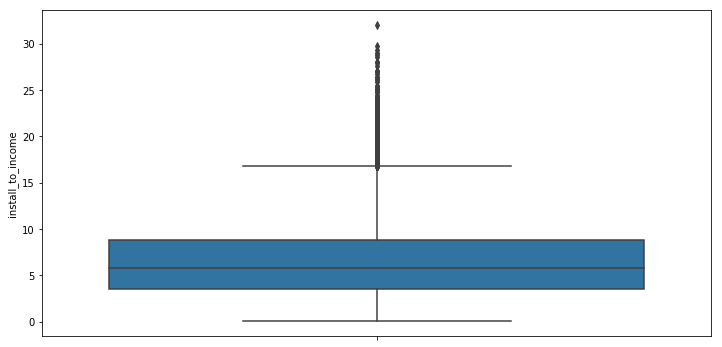

In [103]:
# Plotting Box plot for install_to_income ratio Column
plt.figure(figsize = (12,6))
ax = sns.boxplot(y="install_to_income", data=loan)
plt.show()

#### From the above inspection
The range of dti lies between __0.03 and 32.03__.<br>
So segmenting the __install_to_income into different segment__ in range of __0 to 35__ with increment of __5__ like 0-5,5-10, 10-15 etc.

In [104]:
# Segmenting install_to_income ratio into different ranges like 0-10,10-20,20-30 etc
loan['install_to_income_bin'] = pd.cut(loan['install_to_income'], range(0, 35, 5), right=False, include_lowest=True)

# Calculating % of install_to_income bin and loan_status
loanstatus_install2income = loan.groupby(['install_to_income_bin','loan_status']).id.count()
loanstatus_install2income_per = loanstatus_install2income.groupby(level=[0]).apply(lambda x: round(100*(x/x.sum()),2))
loanstatus_install2income_per = loanstatus_install2income_per.reset_index()
loanstatus_install2income_per.head(5)

,install_to_income_bin,loan_status,id
0,"[0, 5)",Charged Off,11.73
1,"[0, 5)",Current,2.20
2,"[0, 5)",Fully Paid,86.07
3,"[5, 10)",Charged Off,14.31
4,"[5, 10)",Current,3.33


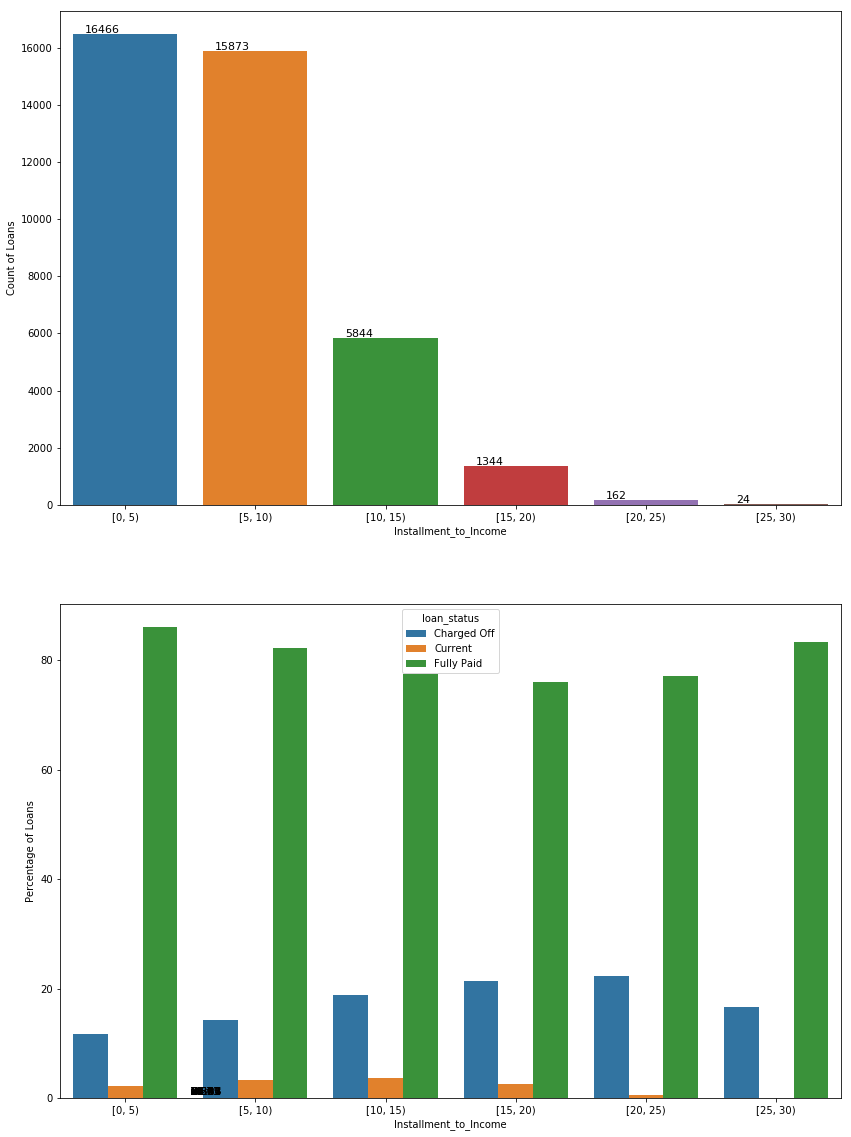

In [105]:
# Defining figure size and initializing subplots
plt.subplots(figsize=(14,20))

# Plot for count of loans and install_to_income_bin.
plt.subplot(2,1,1)
ax = sns.countplot(x='install_to_income_bin', data=loan)
ax.set(xlabel = 'Installment_to_Income', ylabel = 'Count of Loans')

# Adding count of loans to bars
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+40,int(i.get_height()), fontsize=11)


# Plot for Percentage of loans for install_to_income_bin and loan_status .
plt.subplot(2,1,2)
ax=sns.barplot(x='install_to_income_bin', y='id',hue='loan_status', data=loanstatus_install2income_per) 
ax.set(xlabel = 'Installment_to_Income', ylabel = 'Percentage of Loans')

# Adding % of loans to bars
for i in ax.patches:
    ax.text(0.5, 0.5, i.get_height(), fontsize=11)

plt.show()

#### We can see from the plot that:
As the ratio of installment_to_income increases the possibility of loan getting default(Charged Off) increases.
So, we can consider __installment_to_income__ ratio as one of the __Driving variable for loan default(Chared off)__

####  As the ratio of installment_to_income increases 
    From (0-5)% -> (5-10)% -> (10-15)% ->(15-20)% -> (20-25)% --- percentage of loan being Charge off increase
    From (25-30)% -- percentage of loan decreases because there is not enough data. Still if we extrapolate the percentage 
    then it would be on higher side as compared to lesser ratios.

### From Exploratory Anlysis conducted, the Driving Variable which are strong indicators of default are:
1. Term
2. Grade / Subgrade
3. Interest rate
4. Debi to income (dti) ratio
5. Delinquency (2 yrs) (delinq_2yrs)
6. Open Account (Credit Line) (open_acc)
7. Derogatory public record (pub_rec)
8. Revolving Utilization (revol_util)
9. Annual Income (annual_inc)

### Conclusion
1. Loan term shows strong relationship with loan_status
2. Grade and Subgrade influence the loan_status strongly.
3. Loan are getting more defaulted when income is verified.
4. Home ownership provides stable information about defaulters.
5. Loan provided to 'Small business' defaulted most ~25%.
6. Grade E , F , G shows more defaulters than any other Grades.
7. Lower the income of borrower, more the probability of loan getting defaulted.